In [1]:
!pip install tweepy
!pip install vaderSentiment
!pip install python-louvain

In [3]:
import csv
import re
import string
import random

with open('C:/Users/Admin/Desktop/loksabhaelections/Narrative4.csv', encoding="iso-8859-1") as csvfile:
    data = list(csv.reader(csvfile))

list_of_tweets = []
for i in range(1, len(data)):
    
    tweet = data[i][2]

    # remove \n from the end after every sentence
    tweet = tweet.strip('\n')

    # Remove any word that starts with the symbol @
    tweet = " ".join(filter(lambda x: x[0] != '@', tweet.split()))

    # Remove any URL
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"www\S+", "", tweet)

    # remove colons from the end of the sentences (if any) after removing url
    tweet = tweet.strip()
    tweet_len = len(tweet)
    if tweet_len > 0:
        if tweet[len(tweet) - 1] == ':':
            tweet = tweet[:len(tweet) - 1]

    # Remove any hash-tags symbols
    tweet = tweet.replace('#', '')

    # Convert every word to lowercase
    tweet = tweet.lower()

    # remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    # trim extra spaces
    tweet = " ".join(tweet.split())

    # convert each tweet from string type to as list<string> using " " as a delimiter
    list_of_tweets.append(tweet.split(' '))
tweets_exp=[]
tweets_abs=[]
if len(list_of_tweets)>500:
    indexes=random.sample(range(1,len(list_of_tweets)),500)
    for i in range(len(indexes)):
        tweets_exp.append(list_of_tweets[indexes[i]])
    for i in range(len(indexes)):
        tweets_abs.append(list_of_tweets[indexes[i]])
else:
    for i in range(len(list_of_tweets)):
        tweets_exp.append(list_of_tweets[i])
    for i in range(len(list_of_tweets)):
        tweets_abs.append(list_of_tweets[i])
    

In [5]:
print('found %d tweets' % len(tweets_abs))

found 500 tweets


In [6]:
#getting expression words from pwords and nwords file

f = open('C:/Users/Admin/Jaccard_Similarity/Health_Tweets/pwords.txt', "r", encoding="utf8")
pwords = list(f)
    
f = open('C:/Users/Admin/Jaccard_Similarity/Health_Tweets/nwords.txt', "r", encoding="utf8")
nwords = list(f)

for i in range(len(pwords)):
    pwords[i] = pwords[i].strip('\n')
for i in range(len(nwords)):
    nwords[i] = nwords[i].strip('\n')

In [7]:
#removing expression words from tweets
for n,text in enumerate(tweets_abs):  
    ntext = []
    for word in text:
        if word not in pwords and word not in nwords:
            ntext.append(word) 
    tweets_abs[n] = ntext
    
for n,text in enumerate(tweets_exp):  
    ntext = []
    for word in text:
        if word in pwords or word in nwords:
            ntext.append(word) 
    tweets_exp[n] = ntext
    

tweets_abs = [' '.join(i) for i in tweets_abs]
tweets_exp = [' '.join(i) for i in tweets_exp]

In [8]:
tweets_exp

['grim',
 'grim',
 'supreme misuse',
 'grim',
 '',
 'killing victory issues',
 'supreme misuse',
 'grim',
 'work promises work',
 'winning',
 'lie',
 'promised kill weaken',
 'best',
 'best',
 'achievement fool',
 'grim',
 'waste',
 'gained',
 'win hard work work honest win greed dishonesty win win',
 '',
 'promised kill weaken',
 'grim',
 'lose',
 'promised kill weaken',
 'promised kill weaken',
 '',
 'promised kill weaken',
 'gratitude strong decisive win',
 'promised kill weaken',
 '',
 'best',
 'grim',
 '',
 'gratitude strong decisive win',
 'good respectful',
 '',
 'supreme misuse',
 'best',
 'grim',
 'grim',
 'promised kill weaken',
 'promises promise work',
 'promised kill weaken',
 'promised kill weaken',
 'promised kill weaken',
 'promised kill weaken',
 'credible',
 '',
 'cheaper',
 'worried speedy recovery fast',
 'grim',
 'promised kill weaken',
 '',
 'supreme misuse',
 'clear contention openly led',
 '',
 '',
 '',
 '',
 'killing victory issues',
 'grim',
 'fake win fake',


In [9]:
#working on abstraction score(tweets_abs)........................................................................

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer()
sparse_matrix = tfidf_vectorizer.fit_transform(tweets_abs)

doc_term_matrix = sparse_matrix.todense()
df_abs = pd.DataFrame(doc_term_matrix, 
                  columns=tfidf_vectorizer.get_feature_names())
print(doc_term_matrix)
print(cosine_similarity(df_abs))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1.         1.         0.04273804 ... 0.04038989 0.01988166 0.05399274]
 [1.         1.         0.04273804 ... 0.04038989 0.01988166 0.05399274]
 [0.04273804 0.04273804 1.         ... 0.02321135 0.08541134 0.08095573]
 ...
 [0.04038989 0.04038989 0.02321135 ... 1.         0.0112754  0.07727485]
 [0.01988166 0.01988166 0.08541134 ... 0.0112754  1.         0.03858116]
 [0.05399274 0.05399274 0.08095573 ... 0.07727485 0.03858116 1.        ]]


In [11]:
import matplotlib.pyplot as plt
import networkx as nx

Gabs = nx.Graph()

l = len(tweets_abs)
for i in range(l):
    for j in range(i+1, l):
        if cosine_similarity(df_abs)[i][j] != 0:
            print(i, j)
            Gabs.add_edge(str(i), str(j), weight = cosine_similarity(df_abs)[i][j])

e = [(u, v) for (u, v, d) in Gabs.edges(data=True)]
#esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(Gabs)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(Gabs, pos, node_size=200)

# edges
nx.draw_networkx_edges(Gabs, pos, edgelist=e,
                       width=.3)
# labels
nx.draw_networkx_labels(Gabs, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184
0 185
0 18

2 434
2 435
2 436
2 437
2 438
2 439
2 440
2 441
2 442
2 443
2 444
2 445
2 446
2 447
2 448
2 449
2 450
2 451
2 452
2 453
2 454
2 455
2 456
2 457
2 458
2 459
2 460
2 461
2 462
2 463
2 464
2 465
2 466
2 467
2 468
2 469
2 470
2 471
2 472
2 473
2 474
2 475
2 476
2 477
2 478
2 479
2 480
2 481
2 482
2 483
2 484
2 485
2 486
2 487
2 488
2 489
2 490
2 491
2 492
2 493
2 494
2 495
2 496
2 497
2 498
2 499
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
3 43
3 44
3 45
3 46
3 47
3 48
3 49
3 50
3 51
3 52
3 53
3 54
3 55
3 56
3 57
3 58
3 59
3 60
3 61
3 62
3 63
3 64
3 65
3 66
3 67
3 68
3 69
3 70
3 71
3 72
3 73
3 74
3 75
3 76
3 77
3 78
3 79
3 80
3 81
3 82
3 83
3 84
3 85
3 86
3 87
3 88
3 89
3 90
3 91
3 92
3 93
3 94
3 95
3 96
3 97
3 98
3 99
3 100
3 101
3 102
3 103
3 104
3 105
3 106
3 107
3 108
3 109
3 110
3 111
3 112
3 113
3 114
3 115
3 116
3 117
3 118
3 119
3 120
3 12

7 147
7 148
7 150
7 151
7 152
7 153
7 154
7 155
7 156
7 157
7 158
7 159
7 160
7 161
7 162
7 163
7 164
7 165
7 166
7 167
7 168
7 169
7 170
7 171
7 172
7 173
7 174
7 175
7 176
7 177
7 178
7 179
7 180
7 181
7 182
7 183
7 184
7 185
7 186
7 187
7 188
7 189
7 190
7 191
7 192
7 193
7 194
7 195
7 196
7 197
7 198
7 199
7 200
7 201
7 202
7 203
7 204
7 205
7 206
7 207
7 208
7 209
7 210
7 211
7 212
7 213
7 214
7 215
7 216
7 217
7 218
7 219
7 220
7 221
7 222
7 223
7 224
7 225
7 226
7 227
7 228
7 229
7 230
7 231
7 232
7 233
7 234
7 235
7 236
7 237
7 239
7 240
7 241
7 242
7 243
7 244
7 245
7 246
7 247
7 248
7 249
7 250
7 251
7 252
7 253
7 254
7 255
7 256
7 257
7 258
7 259
7 260
7 261
7 262
7 263
7 264
7 265
7 266
7 267
7 268
7 269
7 270
7 271
7 272
7 273
7 274
7 275
7 276
7 277
7 278
7 279
7 280
7 281
7 282
7 283
7 284
7 285
7 286
7 287
7 288
7 289
7 290
7 291
7 292
7 293
7 294
7 295
7 296
7 297
7 298
7 299
7 300
7 301
7 302
7 303
7 304
7 305
7 306
7 307
7 308
7 309
7 310
7 311
7 312
7 313
7 314
7 31

10 472
10 473
10 474
10 475
10 476
10 477
10 478
10 479
10 480
10 481
10 482
10 483
10 484
10 485
10 486
10 487
10 488
10 489
10 490
10 491
10 492
10 493
10 494
10 495
10 496
10 497
10 498
10 499
11 12
11 13
11 14
11 15
11 16
11 17
11 18
11 19
11 20
11 21
11 22
11 23
11 24
11 25
11 26
11 27
11 28
11 29
11 30
11 31
11 32
11 33
11 34
11 35
11 36
11 37
11 38
11 39
11 40
11 41
11 42
11 43
11 44
11 45
11 46
11 47
11 48
11 49
11 50
11 51
11 52
11 53
11 54
11 55
11 56
11 57
11 58
11 59
11 60
11 61
11 62
11 63
11 64
11 65
11 66
11 67
11 68
11 69
11 70
11 71
11 72
11 73
11 74
11 75
11 76
11 77
11 78
11 79
11 80
11 81
11 82
11 83
11 84
11 85
11 86
11 87
11 88
11 89
11 90
11 91
11 92
11 93
11 94
11 95
11 96
11 97
11 98
11 99
11 100
11 101
11 102
11 103
11 104
11 105
11 106
11 107
11 108
11 109
11 110
11 111
11 112
11 113
11 114
11 115
11 116
11 117
11 118
11 119
11 120
11 121
11 122
11 123
11 124
11 125
11 126
11 127
11 128
11 129
11 130
11 131
11 132
11 133
11 134
11 135
11 136
11 137
11 138
11 

15 129
15 130
15 131
15 132
15 133
15 134
15 135
15 136
15 137
15 138
15 139
15 140
15 141
15 142
15 143
15 144
15 145
15 146
15 147
15 148
15 150
15 151
15 152
15 153
15 154
15 155
15 156
15 157
15 158
15 159
15 160
15 161
15 162
15 163
15 164
15 165
15 166
15 167
15 168
15 169
15 170
15 171
15 172
15 173
15 174
15 175
15 176
15 177
15 178
15 179
15 180
15 181
15 182
15 183
15 184
15 185
15 186
15 187
15 188
15 189
15 190
15 191
15 192
15 193
15 194
15 195
15 196
15 197
15 198
15 199
15 200
15 201
15 202
15 203
15 204
15 205
15 206
15 207
15 208
15 209
15 210
15 211
15 212
15 213
15 214
15 215
15 216
15 217
15 218
15 219
15 220
15 221
15 222
15 223
15 224
15 225
15 226
15 227
15 228
15 229
15 230
15 231
15 232
15 233
15 234
15 235
15 236
15 237
15 239
15 240
15 241
15 242
15 243
15 244
15 245
15 246
15 247
15 248
15 249
15 250
15 251
15 252
15 253
15 254
15 255
15 256
15 257
15 258
15 259
15 260
15 261
15 262
15 263
15 264
15 265
15 266
15 267
15 268
15 269
15 270
15 271
15 272
15 273

19 136
19 137
19 138
19 139
19 140
19 141
19 142
19 143
19 144
19 145
19 146
19 147
19 148
19 150
19 151
19 152
19 153
19 154
19 155
19 156
19 157
19 158
19 159
19 160
19 161
19 162
19 163
19 164
19 165
19 166
19 167
19 168
19 169
19 170
19 171
19 172
19 173
19 174
19 175
19 176
19 177
19 178
19 179
19 180
19 181
19 182
19 183
19 184
19 185
19 186
19 187
19 188
19 189
19 190
19 191
19 192
19 193
19 194
19 195
19 196
19 197
19 198
19 199
19 200
19 201
19 202
19 203
19 204
19 205
19 206
19 207
19 208
19 209
19 210
19 211
19 212
19 213
19 214
19 215
19 216
19 217
19 218
19 219
19 220
19 221
19 222
19 223
19 224
19 225
19 226
19 227
19 228
19 229
19 230
19 231
19 232
19 233
19 234
19 235
19 236
19 237
19 238
19 239
19 240
19 241
19 242
19 243
19 244
19 245
19 246
19 247
19 248
19 249
19 250
19 251
19 252
19 253
19 254
19 255
19 256
19 257
19 258
19 259
19 260
19 261
19 262
19 263
19 264
19 265
19 266
19 267
19 268
19 269
19 270
19 271
19 272
19 273
19 274
19 275
19 276
19 277
19 278
19 279

22 490
22 491
22 492
22 493
22 494
22 495
22 496
22 497
22 498
22 499
23 24
23 25
23 26
23 27
23 28
23 29
23 30
23 31
23 32
23 33
23 34
23 35
23 36
23 37
23 38
23 39
23 40
23 41
23 42
23 43
23 44
23 45
23 46
23 47
23 48
23 49
23 50
23 51
23 52
23 53
23 54
23 55
23 56
23 57
23 58
23 59
23 60
23 61
23 62
23 63
23 64
23 65
23 66
23 67
23 68
23 69
23 70
23 71
23 72
23 73
23 74
23 75
23 76
23 77
23 78
23 79
23 80
23 81
23 82
23 83
23 84
23 85
23 86
23 87
23 88
23 89
23 90
23 91
23 92
23 93
23 94
23 95
23 96
23 97
23 98
23 99
23 100
23 101
23 102
23 103
23 104
23 105
23 106
23 107
23 108
23 109
23 110
23 111
23 112
23 113
23 114
23 115
23 116
23 117
23 118
23 119
23 120
23 121
23 122
23 123
23 124
23 125
23 126
23 127
23 128
23 129
23 130
23 131
23 132
23 133
23 134
23 135
23 136
23 137
23 138
23 139
23 140
23 141
23 142
23 143
23 144
23 145
23 146
23 147
23 148
23 149
23 150
23 151
23 152
23 153
23 154
23 155
23 156
23 157
23 158
23 159
23 160
23 161
23 162
23 163
23 164
23 165
23 166
23 16

33 41
33 42
33 43
33 44
33 45
33 46
33 47
33 48
33 49
33 50
33 51
33 52
33 53
33 54
33 55
33 56
33 57
33 58
33 59
33 60
33 61
33 62
33 63
33 64
33 65
33 66
33 67
33 68
33 69
33 70
33 71
33 72
33 73
33 74
33 75
33 76
33 77
33 78
33 79
33 80
33 81
33 82
33 83
33 84
33 85
33 86
33 87
33 88
33 89
33 90
33 91
33 92
33 93
33 94
33 95
33 96
33 97
33 98
33 99
33 100
33 101
33 102
33 103
33 104
33 105
33 106
33 107
33 108
33 109
33 110
33 111
33 112
33 113
33 114
33 115
33 116
33 117
33 118
33 119
33 120
33 121
33 122
33 123
33 124
33 125
33 126
33 127
33 128
33 129
33 130
33 131
33 132
33 133
33 134
33 135
33 136
33 137
33 138
33 139
33 140
33 141
33 142
33 143
33 144
33 145
33 146
33 147
33 148
33 150
33 151
33 152
33 153
33 154
33 155
33 156
33 157
33 158
33 159
33 160
33 161
33 162
33 163
33 164
33 165
33 166
33 167
33 168
33 169
33 170
33 171
33 172
33 173
33 174
33 175
33 176
33 177
33 178
33 179
33 180
33 181
33 182
33 183
33 184
33 185
33 186
33 187
33 188
33 189
33 190
33 191
33 192
33

38 230
38 231
38 232
38 233
38 234
38 235
38 236
38 237
38 239
38 240
38 241
38 242
38 243
38 244
38 245
38 246
38 247
38 248
38 249
38 250
38 251
38 252
38 253
38 254
38 255
38 256
38 257
38 258
38 259
38 260
38 261
38 262
38 263
38 264
38 265
38 266
38 267
38 268
38 269
38 270
38 271
38 272
38 273
38 274
38 275
38 276
38 277
38 278
38 279
38 280
38 281
38 282
38 283
38 284
38 285
38 286
38 287
38 288
38 289
38 290
38 291
38 292
38 293
38 294
38 295
38 296
38 297
38 298
38 299
38 300
38 301
38 302
38 303
38 304
38 305
38 306
38 307
38 308
38 309
38 310
38 311
38 312
38 313
38 314
38 315
38 316
38 317
38 318
38 319
38 320
38 321
38 322
38 323
38 324
38 325
38 326
38 327
38 328
38 329
38 330
38 331
38 332
38 333
38 334
38 335
38 336
38 337
38 338
38 339
38 340
38 341
38 342
38 343
38 344
38 345
38 346
38 347
38 348
38 349
38 350
38 351
38 352
38 353
38 354
38 355
38 356
38 357
38 358
38 359
38 360
38 361
38 362
38 363
38 364
38 365
38 366
38 367
38 368
38 369
38 370
38 371
38 372
38 373

46 477
46 478
46 479
46 480
46 481
46 482
46 483
46 484
46 485
46 486
46 487
46 488
46 489
46 490
46 491
46 492
46 493
46 494
46 495
46 496
46 497
46 498
46 499
47 48
47 49
47 50
47 51
47 52
47 53
47 54
47 55
47 56
47 57
47 58
47 59
47 60
47 61
47 62
47 63
47 64
47 65
47 66
47 67
47 68
47 69
47 70
47 71
47 72
47 73
47 74
47 75
47 76
47 77
47 78
47 79
47 80
47 81
47 82
47 83
47 84
47 85
47 86
47 87
47 88
47 89
47 90
47 91
47 92
47 93
47 94
47 95
47 96
47 97
47 98
47 99
47 100
47 101
47 102
47 103
47 104
47 105
47 106
47 107
47 108
47 109
47 110
47 111
47 112
47 113
47 114
47 115
47 116
47 117
47 118
47 119
47 120
47 121
47 122
47 123
47 124
47 125
47 126
47 127
47 128
47 129
47 130
47 131
47 132
47 133
47 134
47 135
47 136
47 137
47 138
47 139
47 140
47 141
47 142
47 143
47 144
47 145
47 146
47 147
47 148
47 149
47 150
47 151
47 152
47 153
47 154
47 155
47 156
47 157
47 158
47 159
47 160
47 161
47 162
47 163
47 164
47 165
47 166
47 167
47 168
47 169
47 170
47 171
47 172
47 173
47 174
47

49 328
49 329
49 330
49 331
49 332
49 333
49 334
49 335
49 336
49 337
49 338
49 339
49 340
49 341
49 342
49 343
49 344
49 345
49 346
49 347
49 348
49 349
49 350
49 351
49 352
49 353
49 354
49 355
49 356
49 357
49 358
49 359
49 360
49 361
49 362
49 363
49 364
49 365
49 366
49 367
49 368
49 369
49 370
49 371
49 372
49 373
49 374
49 375
49 376
49 377
49 378
49 379
49 380
49 381
49 382
49 383
49 384
49 385
49 386
49 387
49 388
49 389
49 390
49 391
49 392
49 393
49 394
49 395
49 396
49 397
49 398
49 399
49 400
49 401
49 402
49 403
49 404
49 405
49 406
49 407
49 408
49 409
49 410
49 411
49 412
49 413
49 414
49 415
49 416
49 417
49 418
49 419
49 420
49 421
49 422
49 423
49 424
49 425
49 426
49 427
49 428
49 429
49 430
49 431
49 432
49 433
49 434
49 435
49 436
49 437
49 438
49 439
49 440
49 441
49 442
49 443
49 444
49 445
49 446
49 447
49 448
49 449
49 450
49 451
49 452
49 453
49 454
49 455
49 456
49 457
49 458
49 459
49 460
49 461
49 462
49 463
49 464
49 465
49 466
49 467
49 468
49 469
49 470

53 259
53 260
53 261
53 262
53 263
53 264
53 265
53 266
53 267
53 268
53 269
53 270
53 271
53 272
53 273
53 274
53 275
53 276
53 277
53 278
53 279
53 280
53 281
53 282
53 283
53 284
53 285
53 286
53 287
53 288
53 289
53 290
53 291
53 292
53 293
53 294
53 295
53 296
53 297
53 298
53 299
53 300
53 301
53 302
53 303
53 304
53 305
53 306
53 307
53 308
53 309
53 310
53 311
53 312
53 313
53 314
53 316
53 317
53 318
53 319
53 320
53 321
53 322
53 323
53 324
53 325
53 326
53 327
53 328
53 329
53 330
53 331
53 332
53 333
53 334
53 335
53 336
53 337
53 338
53 339
53 340
53 341
53 342
53 343
53 344
53 345
53 346
53 347
53 348
53 349
53 350
53 351
53 352
53 353
53 354
53 355
53 356
53 357
53 358
53 359
53 360
53 361
53 362
53 363
53 364
53 365
53 366
53 367
53 368
53 369
53 370
53 371
53 372
53 373
53 374
53 375
53 376
53 377
53 378
53 379
53 380
53 382
53 383
53 384
53 385
53 386
53 387
53 388
53 389
53 390
53 391
53 392
53 393
53 394
53 395
53 396
53 397
53 398
53 399
53 400
53 401
53 402
53 403

58 468
58 469
58 470
58 471
58 472
58 473
58 474
58 475
58 476
58 477
58 478
58 479
58 480
58 481
58 482
58 483
58 484
58 485
58 486
58 487
58 488
58 489
58 490
58 491
58 492
58 493
58 494
58 495
58 496
58 497
58 498
58 499
59 60
59 61
59 62
59 63
59 64
59 65
59 66
59 67
59 68
59 69
59 70
59 71
59 72
59 73
59 74
59 75
59 76
59 77
59 78
59 79
59 80
59 81
59 82
59 83
59 84
59 85
59 86
59 87
59 88
59 89
59 90
59 91
59 92
59 93
59 94
59 95
59 96
59 97
59 98
59 99
59 100
59 101
59 102
59 103
59 104
59 105
59 106
59 107
59 108
59 109
59 110
59 111
59 112
59 113
59 114
59 115
59 116
59 117
59 118
59 119
59 120
59 121
59 122
59 123
59 124
59 125
59 126
59 127
59 128
59 129
59 130
59 131
59 132
59 133
59 134
59 135
59 136
59 137
59 138
59 139
59 140
59 141
59 142
59 143
59 144
59 145
59 146
59 147
59 148
59 150
59 151
59 152
59 153
59 154
59 155
59 156
59 157
59 158
59 159
59 160
59 161
59 162
59 163
59 164
59 165
59 166
59 167
59 168
59 169
59 170
59 171
59 172
59 173
59 174
59 175
59 176
59 1

61 343
61 344
61 345
61 346
61 347
61 348
61 349
61 350
61 351
61 352
61 353
61 354
61 355
61 356
61 357
61 358
61 359
61 360
61 361
61 362
61 363
61 364
61 365
61 366
61 367
61 368
61 369
61 370
61 371
61 372
61 373
61 374
61 375
61 376
61 377
61 378
61 379
61 380
61 381
61 382
61 383
61 384
61 385
61 386
61 387
61 388
61 389
61 390
61 391
61 392
61 393
61 394
61 395
61 396
61 397
61 398
61 399
61 400
61 401
61 402
61 403
61 404
61 405
61 406
61 407
61 408
61 409
61 410
61 411
61 412
61 413
61 414
61 415
61 416
61 417
61 418
61 419
61 420
61 421
61 422
61 423
61 424
61 425
61 426
61 427
61 428
61 429
61 430
61 431
61 432
61 433
61 434
61 435
61 436
61 437
61 438
61 439
61 440
61 441
61 442
61 443
61 444
61 445
61 446
61 447
61 448
61 449
61 450
61 451
61 452
61 453
61 454
61 455
61 456
61 457
61 458
61 459
61 460
61 461
61 462
61 463
61 464
61 465
61 466
61 467
61 468
61 469
61 470
61 471
61 472
61 473
61 474
61 475
61 476
61 477
61 478
61 479
61 480
61 481
61 482
61 483
61 484
61 485

64 225
64 226
64 227
64 228
64 229
64 230
64 231
64 232
64 233
64 234
64 235
64 236
64 237
64 238
64 239
64 240
64 241
64 242
64 243
64 244
64 245
64 246
64 247
64 248
64 249
64 250
64 251
64 252
64 253
64 254
64 255
64 256
64 257
64 258
64 259
64 260
64 261
64 262
64 263
64 264
64 265
64 266
64 267
64 268
64 269
64 270
64 271
64 272
64 273
64 274
64 275
64 276
64 277
64 278
64 279
64 280
64 281
64 282
64 283
64 284
64 285
64 286
64 287
64 288
64 289
64 290
64 291
64 292
64 293
64 294
64 295
64 296
64 297
64 298
64 299
64 300
64 301
64 302
64 303
64 304
64 305
64 306
64 307
64 308
64 309
64 310
64 311
64 312
64 313
64 314
64 315
64 316
64 317
64 318
64 319
64 320
64 321
64 322
64 323
64 324
64 325
64 326
64 327
64 328
64 329
64 330
64 331
64 332
64 333
64 334
64 335
64 336
64 337
64 338
64 339
64 340
64 341
64 342
64 343
64 344
64 345
64 346
64 347
64 348
64 349
64 350
64 351
64 352
64 353
64 354
64 355
64 356
64 357
64 358
64 359
64 360
64 361
64 362
64 363
64 364
64 365
64 366
64 367

67 118
67 119
67 120
67 121
67 122
67 123
67 124
67 125
67 126
67 127
67 128
67 129
67 130
67 131
67 132
67 133
67 134
67 135
67 136
67 137
67 138
67 139
67 140
67 141
67 142
67 143
67 144
67 145
67 146
67 147
67 148
67 149
67 150
67 151
67 152
67 153
67 154
67 155
67 156
67 157
67 158
67 159
67 160
67 161
67 162
67 163
67 164
67 165
67 166
67 167
67 168
67 169
67 170
67 171
67 172
67 173
67 174
67 175
67 176
67 177
67 178
67 179
67 180
67 181
67 182
67 183
67 184
67 185
67 186
67 187
67 188
67 189
67 190
67 191
67 192
67 193
67 194
67 195
67 196
67 197
67 198
67 199
67 200
67 201
67 202
67 203
67 204
67 205
67 206
67 207
67 208
67 209
67 210
67 211
67 212
67 213
67 214
67 215
67 216
67 217
67 218
67 219
67 220
67 221
67 222
67 223
67 224
67 225
67 226
67 227
67 228
67 229
67 230
67 231
67 232
67 233
67 234
67 235
67 236
67 237
67 238
67 239
67 240
67 241
67 242
67 243
67 244
67 245
67 246
67 247
67 248
67 249
67 250
67 251
67 252
67 253
67 254
67 255
67 256
67 257
67 258
67 259
67 260

71 175
71 176
71 177
71 178
71 179
71 180
71 181
71 182
71 183
71 184
71 185
71 186
71 187
71 188
71 189
71 190
71 191
71 192
71 193
71 194
71 195
71 196
71 197
71 198
71 199
71 200
71 201
71 202
71 203
71 204
71 205
71 206
71 207
71 208
71 209
71 210
71 211
71 212
71 213
71 214
71 215
71 216
71 217
71 218
71 219
71 220
71 221
71 222
71 223
71 224
71 225
71 226
71 227
71 228
71 229
71 230
71 231
71 232
71 233
71 234
71 235
71 236
71 237
71 238
71 239
71 240
71 241
71 242
71 243
71 244
71 245
71 246
71 247
71 248
71 249
71 250
71 251
71 252
71 253
71 254
71 255
71 256
71 257
71 258
71 259
71 260
71 261
71 262
71 263
71 264
71 265
71 266
71 267
71 268
71 269
71 270
71 271
71 272
71 273
71 274
71 275
71 276
71 277
71 278
71 279
71 280
71 281
71 282
71 283
71 284
71 285
71 286
71 287
71 288
71 289
71 290
71 291
71 292
71 293
71 294
71 295
71 296
71 297
71 298
71 299
71 300
71 301
71 302
71 303
71 304
71 305
71 306
71 307
71 308
71 309
71 310
71 311
71 312
71 313
71 314
71 315
71 316
71 317

74 81
74 82
74 83
74 84
74 85
74 86
74 87
74 88
74 89
74 90
74 91
74 92
74 93
74 94
74 95
74 96
74 97
74 98
74 99
74 100
74 101
74 102
74 103
74 104
74 105
74 106
74 107
74 108
74 109
74 110
74 111
74 112
74 113
74 114
74 115
74 116
74 117
74 118
74 119
74 120
74 121
74 122
74 123
74 124
74 125
74 126
74 127
74 128
74 129
74 130
74 131
74 132
74 133
74 134
74 135
74 136
74 137
74 138
74 139
74 140
74 141
74 142
74 143
74 144
74 145
74 146
74 147
74 148
74 149
74 150
74 151
74 152
74 153
74 154
74 155
74 156
74 157
74 158
74 159
74 160
74 161
74 162
74 163
74 164
74 165
74 166
74 167
74 168
74 169
74 170
74 171
74 172
74 173
74 174
74 175
74 176
74 177
74 178
74 179
74 180
74 181
74 182
74 183
74 184
74 185
74 186
74 187
74 188
74 189
74 190
74 191
74 192
74 193
74 194
74 195
74 196
75 421
75 422
75 423
75 424
75 425
75 426
75 427
75 428
75 429
75 430
75 431
75 432
75 433
75 434
75 435
75 436
75 437
75 438
75 439
75 440
75 441
75 442
75 443
75 444
75 445
75 446
75 447
75 448
75 449
75 4

78 228
78 229
78 230
78 231
78 232
78 233
78 234
78 235
78 236
78 237
78 239
78 240
78 241
78 242
78 243
78 244
78 245
78 246
78 247
78 248
78 249
78 250
78 251
78 252
78 253
78 254
78 255
78 256
78 257
78 258
78 259
78 260
78 261
78 262
78 263
78 264
78 265
78 266
78 267
78 268
78 269
78 270
78 271
78 272
78 273
78 274
78 275
78 276
78 277
78 278
78 279
78 280
78 281
78 282
78 283
78 284
78 285
78 286
78 287
78 288
78 289
78 290
78 291
78 292
78 293
78 294
78 295
78 296
78 297
78 298
78 299
78 300
78 301
78 302
78 303
78 304
78 305
78 306
78 307
78 308
78 309
78 310
78 311
78 312
78 313
78 314
78 315
78 316
78 317
78 318
78 319
78 320
78 321
78 322
78 323
78 324
78 325
78 326
78 327
78 328
78 329
78 330
78 331
78 332
78 333
78 334
78 335
78 336
78 337
78 338
78 339
78 340
78 341
78 342
78 343
78 344
78 345
78 346
78 347
78 348
78 349
78 350
78 351
78 352
78 353
78 354
78 355
78 356
78 357
78 358
78 359
78 360
78 361
78 362
78 363
78 364
78 365
78 366
78 367
78 368
78 369
78 370
78 371

83 148
83 150
83 151
83 152
83 153
83 154
83 155
83 156
83 157
83 158
83 159
83 160
83 161
83 162
83 163
83 164
83 165
83 166
83 167
83 168
83 169
83 170
83 171
83 172
83 173
83 174
83 175
83 176
83 177
83 178
83 179
83 180
83 181
83 182
83 183
83 184
83 185
83 186
83 187
83 188
83 189
83 190
83 191
83 192
83 193
83 194
83 195
83 196
83 197
83 198
83 199
83 200
83 201
83 202
83 203
83 204
83 205
83 206
83 207
83 208
83 209
83 210
83 211
83 212
83 213
83 214
83 215
83 216
83 217
83 218
83 219
83 220
83 221
83 222
83 223
83 224
83 225
83 226
83 227
83 228
83 229
83 230
83 231
83 232
83 233
83 234
83 235
83 236
83 237
83 239
83 240
83 241
83 242
83 243
83 244
83 245
83 246
83 247
83 248
83 249
83 250
83 251
83 252
83 253
83 254
83 255
83 256
83 257
83 258
83 259
83 260
83 261
83 262
83 263
83 264
83 265
83 266
83 267
83 268
83 269
83 270
83 271
83 272
83 273
83 274
83 275
83 276
83 277
83 278
83 279
83 280
83 281
83 282
83 283
83 284
83 285
83 286
83 287
83 288
83 289
83 290
83 291
83 292

87 487
87 488
87 489
87 490
87 491
87 492
87 493
87 494
87 495
87 496
87 497
87 498
87 499
88 89
88 90
88 91
88 92
88 93
88 94
88 95
88 96
88 97
88 98
88 99
88 100
88 101
88 102
88 103
88 104
88 105
88 106
88 107
88 108
88 109
88 110
88 111
88 112
88 113
88 114
88 115
88 116
88 117
88 118
88 119
88 120
88 121
88 122
88 123
88 124
88 125
88 126
88 127
88 128
88 129
88 130
88 131
88 132
88 133
88 134
88 135
88 136
88 137
88 138
88 139
88 140
88 141
88 142
88 143
88 144
88 145
88 146
88 147
88 148
88 149
88 150
88 151
88 152
88 153
88 154
88 155
88 156
88 157
88 158
88 159
88 160
88 161
88 162
88 163
88 164
88 165
88 166
88 167
88 168
88 169
88 170
88 171
88 172
88 173
88 174
88 175
88 176
88 177
88 178
88 179
88 180
88 181
88 183
88 184
88 185
88 186
88 187
88 188
88 189
88 190
88 191
88 192
88 193
88 194
88 195
88 196
88 197
88 198
88 199
88 200
88 201
88 203
88 204
88 205
88 206
88 207
88 208
88 209
88 210
88 211
88 212
88 213
88 214
88 215
88 216
88 217
88 218
88 219
88 220
88 221
88 

90 444
90 445
90 446
90 447
90 448
90 449
90 450
90 451
90 452
90 453
90 454
90 455
90 456
90 457
90 458
90 459
90 460
90 461
90 462
90 463
90 464
90 465
90 466
90 467
90 468
90 469
90 470
90 471
90 472
90 473
90 474
90 475
90 476
90 477
90 478
90 479
90 480
90 481
90 482
90 483
90 484
90 485
90 486
90 487
90 488
90 489
90 490
90 491
90 492
90 493
90 494
90 495
90 496
90 497
90 498
90 499
91 92
91 93
91 94
91 95
91 96
91 97
91 98
91 99
91 100
91 101
91 102
91 103
91 104
91 105
91 106
91 107
91 108
91 109
91 110
91 111
91 112
91 113
91 114
91 115
91 116
91 117
91 118
91 119
91 120
91 121
91 122
91 123
91 124
91 125
91 126
91 127
91 128
91 129
91 130
91 131
91 132
91 133
91 134
91 135
91 136
91 137
91 138
91 139
91 140
91 141
91 142
91 143
91 144
91 145
91 146
91 147
91 148
91 150
91 151
91 152
91 153
91 154
91 155
91 156
91 157
91 158
91 159
91 160
91 161
91 162
91 163
91 164
91 165
91 166
91 167
91 168
91 169
91 170
91 171
91 172
91 173
91 174
91 175
91 176
91 177
91 178
91 179
91 180


96 376
96 377
96 378
96 379
96 380
96 382
96 383
96 384
96 385
96 386
96 387
96 388
96 389
96 390
96 391
96 392
96 393
96 394
96 395
96 396
96 397
96 398
96 399
96 400
96 401
96 402
96 403
96 404
96 405
96 406
96 407
96 408
96 409
96 410
96 411
96 412
96 413
96 414
96 415
96 416
96 417
96 418
96 419
96 420
96 421
96 422
96 423
96 424
96 425
96 426
96 427
96 428
96 429
96 430
96 431
96 432
96 433
96 434
96 435
96 436
96 437
96 438
96 439
96 440
96 441
96 442
96 443
96 444
96 445
96 446
96 447
96 448
96 449
96 450
96 451
96 452
96 453
96 454
96 455
96 456
96 457
96 458
96 459
96 460
96 461
96 462
96 463
96 464
96 465
96 466
96 467
96 468
96 469
96 470
96 471
96 472
96 473
96 474
96 475
96 476
96 477
96 478
96 479
96 480
96 481
96 482
96 483
96 484
96 485
96 486
96 487
96 488
96 489
96 490
96 491
96 492
96 493
96 494
96 495
96 496
96 497
96 498
96 499
97 98
97 99
97 100
97 101
97 102
97 103
97 104
97 105
97 106
97 107
97 108
97 109
97 110
97 111
97 112
97 113
97 114
97 115
97 116
97 117
9

99 351
99 352
99 353
99 354
99 355
99 356
99 357
99 358
99 359
99 360
99 361
99 362
99 363
99 364
99 365
99 366
99 367
99 368
99 369
99 370
99 371
99 372
99 373
99 374
99 375
99 376
99 377
99 378
99 379
99 380
99 382
99 383
99 384
99 385
99 386
99 387
99 388
99 389
99 390
99 391
99 392
99 393
99 394
99 395
99 396
99 397
99 398
99 399
99 400
99 401
99 402
99 403
99 404
99 405
99 406
99 407
99 408
99 409
99 410
99 411
99 412
99 413
99 414
99 415
99 416
99 417
99 418
99 419
99 420
99 421
99 422
99 423
99 424
99 425
99 426
99 427
99 428
99 429
99 430
99 431
99 432
99 433
99 434
99 435
99 436
99 437
99 438
99 439
99 440
99 441
99 442
99 443
99 444
99 445
99 446
99 447
99 448
99 449
99 450
99 451
99 452
99 453
99 454
99 455
99 456
99 457
99 458
99 459
99 460
99 461
99 462
99 463
99 464
99 465
99 466
99 467
99 468
99 469
99 470
99 471
99 472
99 473
99 474
99 475
99 476
99 477
99 478
99 479
99 480
99 481
99 482
99 483
99 484
99 485
99 486
99 487
99 488
99 489
99 490
99 491
99 492
99 493
99 494

102 204
102 205
102 206
102 207
102 208
102 209
102 210
102 211
102 212
102 213
102 214
102 215
102 216
102 217
102 218
102 219
102 220
102 221
102 222
102 223
102 224
102 225
102 226
102 227
102 228
102 229
102 230
102 231
102 232
102 233
102 234
102 235
102 236
102 237
102 238
102 239
102 240
102 241
102 242
102 243
102 244
102 245
102 246
102 247
102 248
102 249
102 250
102 251
102 252
102 253
102 254
102 255
102 256
102 257
102 258
102 259
102 260
102 261
102 262
102 263
102 264
102 265
102 266
102 267
102 268
102 269
102 270
102 271
102 272
102 273
102 274
102 275
102 276
102 277
102 278
102 279
102 280
102 281
102 282
102 283
102 284
102 285
102 286
102 287
102 288
102 289
102 290
102 291
102 292
102 293
102 294
102 295
102 296
102 297
102 298
102 299
102 300
102 301
102 302
102 303
102 304
102 305
102 306
102 307
102 308
102 309
102 310
102 311
102 312
102 313
102 314
102 315
102 316
102 317
102 318
102 319
102 320
102 321
102 322
102 323
102 324
102 325
102 326
102 327
102 328


104 441
104 442
104 443
104 444
104 445
104 446
104 447
104 448
104 449
104 450
104 451
104 452
104 453
104 454
104 455
104 456
104 457
104 458
104 459
104 460
104 461
104 462
104 463
104 464
104 465
104 466
104 467
104 468
104 469
104 470
104 471
104 472
104 473
104 474
104 475
104 476
104 477
104 478
104 479
104 480
104 481
104 482
104 483
104 484
104 485
104 486
104 487
104 488
104 489
104 490
104 491
104 492
104 493
104 494
104 495
104 496
104 497
104 498
104 499
105 106
105 107
105 108
105 109
105 110
105 111
105 112
105 113
105 114
105 115
105 116
105 117
105 118
105 119
105 120
105 121
105 122
105 123
105 124
105 125
105 126
105 127
105 128
105 129
105 130
105 131
105 132
105 133
105 134
105 135
105 136
105 137
105 138
105 139
105 140
105 141
105 142
105 143
105 144
105 145
105 146
105 147
105 148
105 150
105 151
105 152
105 153
105 154
105 155
105 156
105 157
105 158
105 159
105 160
105 161
105 162
105 163
105 164
105 165
105 166
105 167
105 168
105 169
105 170
105 171
105 172


107 296
107 297
107 298
107 299
107 300
107 301
107 302
107 303
107 304
107 305
107 306
107 307
107 308
107 309
107 310
107 311
107 312
107 313
107 314
107 315
107 316
107 317
107 318
107 319
107 320
107 321
107 322
107 323
107 324
107 325
107 326
107 327
107 328
107 329
107 330
107 331
107 332
107 333
107 334
107 335
107 336
107 337
107 338
107 339
107 340
107 341
107 342
107 343
107 344
107 345
107 346
107 347
107 348
107 349
107 350
107 351
107 352
107 353
107 354
107 355
107 356
107 357
107 358
107 359
107 360
107 361
107 362
107 363
107 364
107 365
107 366
107 367
107 368
107 369
107 370
107 371
107 372
107 373
107 374
107 375
107 376
107 377
107 378
107 379
107 380
107 381
107 382
107 383
107 384
107 385
107 386
107 387
107 388
107 389
107 390
107 391
107 392
107 393
107 394
107 395
107 396
107 397
107 398
107 399
107 400
107 401
107 402
107 403
107 404
107 405
107 406
107 407
107 408
107 409
107 410
107 411
107 412
107 413
107 414
107 415
107 416
107 417
107 418
107 419
107 420


111 494
111 495
111 496
111 497
111 498
111 499
112 113
112 114
112 115
112 116
112 117
112 118
112 119
112 120
112 121
112 122
112 123
112 124
112 125
112 126
112 127
112 128
112 129
112 130
112 131
112 132
112 133
112 134
112 135
112 136
112 137
112 138
112 139
112 140
112 141
112 142
112 143
112 144
112 145
112 146
112 147
112 148
112 150
112 151
112 152
112 153
112 154
112 155
112 156
112 157
112 158
112 159
112 160
112 161
112 162
112 163
112 164
112 165
112 166
112 167
112 168
112 169
112 170
112 171
112 172
112 173
112 174
112 175
112 176
112 177
112 178
112 179
112 180
112 181
112 183
112 184
112 185
112 186
112 187
112 188
112 189
112 190
112 191
112 192
112 193
112 194
112 196
112 197
112 198
112 199
112 200
112 201
112 202
112 203
112 204
112 205
112 206
112 207
112 208
112 209
112 210
112 211
112 212
112 213
112 214
112 215
112 216
112 217
112 218
112 219
112 220
112 221
112 222
112 223
112 224
112 225
112 226
112 227
112 228
112 229
112 230
112 231
112 232
112 233
112 234


116 345
116 346
116 347
116 348
116 349
116 350
116 351
116 352
116 353
116 354
116 355
116 356
116 357
116 358
116 359
116 360
116 361
116 362
116 363
116 364
116 365
116 366
116 367
116 368
116 369
116 370
116 371
116 372
116 373
116 374
116 375
116 376
116 377
116 378
116 379
116 380
116 381
116 382
116 383
116 384
116 385
116 386
116 387
116 388
116 389
116 390
116 391
116 392
116 393
116 394
116 395
116 396
116 397
116 398
116 399
116 400
116 401
116 402
116 403
116 404
116 405
116 406
116 407
116 408
116 409
116 410
116 411
116 412
116 413
116 414
116 415
116 416
116 417
116 418
116 419
116 420
116 421
116 422
116 423
116 424
116 425
116 426
116 427
116 428
116 429
116 430
116 431
116 432
116 433
116 434
116 435
116 436
116 437
116 438
116 439
116 440
116 441
116 442
116 443
116 444
116 445
116 446
116 447
116 448
116 449
116 450
116 451
116 452
116 453
116 454
116 455
116 456
116 457
116 458
116 459
116 460
116 461
116 462
116 463
116 464
116 465
116 466
116 467
116 468
116 469


119 232
119 233
119 234
119 235
119 236
119 237
119 238
119 239
119 240
119 241
119 242
119 243
119 244
119 245
119 246
119 247
119 248
119 249
119 250
119 251
119 252
119 253
119 254
119 255
119 256
119 257
119 258
119 259
119 260
119 261
119 262
119 263
119 264
119 265
119 266
119 267
119 268
119 269
119 270
119 271
119 272
119 273
119 274
119 275
119 276
119 277
119 278
119 279
119 280
119 281
119 282
119 283
119 284
119 285
119 286
119 287
119 288
119 289
119 290
119 291
119 292
119 293
119 294
119 295
119 296
119 297
119 298
119 299
119 300
119 301
119 302
119 303
119 304
119 305
119 306
119 307
119 308
119 309
119 310
119 311
119 312
119 313
119 314
119 315
119 316
119 317
119 318
119 319
119 320
119 321
119 322
119 323
119 324
119 325
119 326
119 327
119 328
119 329
119 330
119 331
119 332
119 333
119 334
119 335
119 336
119 337
119 338
119 339
119 340
119 341
119 342
119 343
119 344
119 345
119 346
119 347
119 348
119 349
119 350
119 351
119 352
119 353
119 354
119 355
119 356


122 133
122 134
122 135
122 136
122 137
122 138
122 139
122 140
122 141
122 142
122 143
122 144
122 145
122 146
122 147
122 148
122 149
122 150
122 151
122 152
122 153
122 154
122 155
122 156
122 157
122 158
122 159
122 160
122 161
122 162
122 163
122 164
122 165
122 166
122 167
122 168
122 169
122 170
122 171
122 172
122 173
122 174
122 175
122 176
122 177
122 178
122 179
122 180
122 181
122 182
122 183
122 184
122 185
122 186
122 187
122 188
122 189
122 190
122 191
122 192
122 193
122 194
122 195
122 196
122 197
122 198
122 199
122 200
122 201
122 202
122 203
122 204
122 205
122 206
122 207
122 208
122 209
122 210
122 211
122 212
122 213
122 214
122 215
122 216
122 217
122 218
122 219
122 220
122 221
122 222
122 223
122 224
122 225
122 226
122 227
122 228
122 229
122 230
122 231
122 232
122 233
122 234
122 235
122 236
122 237
122 238
122 239
122 240
122 241
122 242
122 243
122 244
122 245
122 246
122 247
122 248
122 249
122 250
122 251
122 252
122 253
122 254
122 255
122 256
122 257


124 408
124 409
124 410
124 411
124 412
124 413
124 414
124 415
124 416
124 417
124 418
124 419
124 420
124 421
124 422
124 423
124 424
124 425
124 426
124 427
124 428
124 429
124 430
124 431
124 432
124 433
124 434
124 435
124 436
124 437
124 438
124 439
124 440
124 441
124 442
124 443
124 444
124 445
124 446
124 447
124 448
124 449
124 450
124 451
124 452
124 453
124 454
124 455
124 456
124 457
124 458
124 459
124 460
124 461
124 462
124 463
124 464
124 465
124 466
124 467
124 468
124 469
124 470
124 471
124 472
124 473
124 474
124 475
124 476
124 477
124 478
124 479
124 480
124 481
124 482
124 483
124 484
124 485
124 486
124 487
124 488
124 489
124 490
124 491
124 492
124 493
124 494
124 495
124 496
124 497
124 498
124 499
125 126
125 127
125 128
125 129
125 130
125 131
125 132
125 133
125 134
125 135
125 136
125 137
125 138
125 139
125 140
125 141
125 142
125 143
125 144
125 145
125 146
125 147
125 148
125 149
125 150
125 151
125 152
125 153
125 154
125 155
125 156
125 157
125 158


127 318
127 319
127 320
127 321
127 322
127 323
127 324
127 325
127 326
127 327
127 328
127 329
127 330
127 331
127 332
127 333
127 334
127 335
127 336
127 337
127 338
127 339
127 340
127 341
127 342
127 343
127 344
127 345
127 346
127 347
127 348
127 349
127 350
127 351
127 352
127 353
127 354
127 355
127 356
127 357
127 358
127 359
127 360
127 361
127 362
127 363
127 364
127 365
127 366
127 367
127 368
127 369
127 370
127 371
127 372
127 373
127 374
127 375
127 376
127 377
127 378
127 379
127 380
127 381
127 382
127 383
127 384
127 385
127 386
127 387
127 388
127 389
127 390
127 391
127 392
127 393
127 394
127 395
127 396
127 397
127 398
127 399
127 400
127 401
127 402
127 403
127 404
127 405
127 406
127 407
127 408
127 409
127 410
127 411
127 412
127 413
127 414
127 415
127 416
127 417
127 418
127 419
127 420
127 421
127 422
127 423
127 424
127 425
127 426
127 427
127 428
127 429
127 430
127 431
127 432
127 433
127 434
127 435
127 436
127 437
127 438
127 439
127 440
127 441
127 442


130 242
130 243
130 244
130 245
130 246
130 247
130 248
130 249
130 250
130 251
130 252
130 253
130 254
130 255
130 256
130 257
130 258
130 259
130 260
130 261
130 262
130 263
130 264
130 265
130 266
130 267
130 268
130 269
130 270
130 271
130 272
130 273
130 274
130 275
130 276
130 277
130 278
130 279
130 280
130 281
130 282
130 283
130 284
130 285
130 286
130 287
130 288
130 289
130 290
130 291
130 292
130 293
130 294
130 295
130 296
130 297
130 298
130 299
130 300
130 301
130 302
130 303
130 304
130 305
130 306
130 307
130 308
130 309
130 310
130 311
130 312
130 313
130 314
130 315
130 316
130 317
130 318
130 319
130 320
130 321
130 322
130 323
130 324
130 325
130 326
130 327
130 328
130 329
130 330
130 331
130 332
130 333
130 334
130 335
130 336
130 337
130 338
130 339
130 340
130 341
130 342
130 343
130 344
130 345
130 346
130 347
130 348
130 349
130 350
130 351
130 352
130 353
130 354
130 355
130 356
130 357
130 358
130 359
130 360
130 361
130 362
130 363
130 364
130 365
130 366


133 178
133 179
133 180
133 181
133 182
133 183
133 184
133 185
133 186
133 187
133 188
133 189
133 190
133 191
133 192
133 193
133 194
133 195
133 196
133 197
133 198
133 199
133 200
133 201
133 203
133 204
133 205
133 206
133 207
133 208
133 209
133 210
133 211
133 212
133 213
133 214
133 215
133 216
133 217
133 218
133 219
133 220
133 221
133 222
133 223
133 224
133 225
133 226
133 227
133 228
133 229
133 230
133 231
133 232
133 233
133 234
133 235
133 236
133 237
133 238
133 239
133 240
133 241
133 242
133 243
133 244
133 245
133 246
133 247
133 248
133 249
133 250
133 251
133 252
133 253
133 254
133 255
133 256
133 257
133 258
133 259
133 260
133 261
133 262
133 263
133 264
133 265
133 266
133 267
133 268
133 269
133 270
133 271
133 272
133 273
133 274
133 275
133 276
133 277
133 278
133 279
133 280
133 281
133 282
133 283
133 284
133 285
133 286
133 287
133 288
133 289
133 290
133 291
133 292
133 293
133 294
133 295
133 296
133 297
133 298
133 299
133 300
133 301
133 302
133 303


135 478
135 479
135 480
135 481
135 482
135 483
135 484
135 485
135 486
135 487
135 488
135 489
135 490
135 491
135 492
135 493
135 494
135 495
135 496
135 497
135 498
135 499
136 137
136 138
136 139
136 140
136 141
136 142
136 143
136 144
136 145
136 146
136 147
136 148
136 150
136 151
136 152
136 153
136 154
136 155
136 156
136 157
136 158
136 159
136 160
136 161
136 162
136 163
136 164
136 165
136 166
136 167
136 168
136 169
136 170
136 171
136 172
136 173
136 174
136 175
136 176
136 177
136 178
136 179
136 180
136 181
136 182
136 183
136 184
136 185
136 186
136 187
136 188
136 189
136 190
136 191
136 192
136 193
136 194
136 196
136 197
136 198
136 199
136 200
136 201
136 202
136 203
136 204
136 205
136 206
136 207
136 208
136 209
136 210
136 211
136 212
136 213
136 214
136 215
136 216
136 217
136 218
136 219
136 220
136 221
136 222
136 223
136 224
136 225
136 226
136 227
136 228
136 229
136 230
136 231
136 232
136 233
136 234
136 235
136 236
136 237
136 238
136 239
136 240
136 241


138 430
138 431
138 432
138 433
138 434
138 435
138 436
138 437
138 438
138 439
138 440
138 441
138 442
138 443
138 444
138 445
138 446
138 447
138 448
138 449
138 450
138 451
138 452
138 453
138 454
138 455
138 456
138 457
138 458
138 459
138 460
138 461
138 462
138 463
138 464
138 465
138 466
138 467
138 468
138 469
138 470
138 471
138 472
138 473
138 474
138 475
138 476
138 477
138 478
138 479
138 480
138 481
138 482
138 483
138 484
138 485
138 486
138 487
138 488
138 489
138 490
138 491
138 492
138 493
138 494
138 495
138 496
138 497
138 498
138 499
139 140
139 141
139 142
139 143
139 144
139 145
139 146
139 147
139 148
139 149
139 150
139 151
139 152
139 153
139 154
139 155
139 156
139 157
139 158
139 159
139 160
139 161
139 162
139 163
139 164
139 165
139 166
139 167
139 168
139 169
139 170
139 171
139 172
139 173
139 174
139 175
139 176
139 177
139 178
139 179
139 180
139 181
139 182
139 183
139 184
139 185
139 186
139 187
139 188
139 189
139 190
139 191
139 192
139 193
139 194


141 379
141 380
141 381
141 382
141 383
141 384
141 385
141 386
141 387
141 388
141 389
141 390
141 391
141 392
141 393
141 394
141 395
141 396
141 397
141 398
141 399
141 400
141 401
141 402
141 403
141 404
141 405
141 406
141 407
141 408
141 409
141 410
141 411
141 412
141 413
141 414
141 415
141 416
141 417
141 418
141 419
141 420
141 421
141 422
141 423
141 424
141 425
141 426
141 427
141 428
141 429
141 430
141 431
141 432
141 433
141 434
141 435
141 436
141 437
141 438
141 439
141 440
141 441
141 442
141 443
141 444
141 445
141 446
141 447
141 448
141 449
141 450
141 451
141 452
141 453
141 454
141 455
141 456
141 457
141 458
141 459
141 460
141 461
141 462
141 463
141 464
141 465
141 466
141 467
141 468
141 469
141 470
141 471
141 472
141 473
141 474
141 475
141 476
141 477
141 478
141 479
141 480
141 481
141 482
141 483
141 484
141 485
141 486
141 487
141 488
141 489
141 490
141 491
141 492
141 493
141 494
141 495
141 496
141 497
141 498
141 499
142 143
142 144
142 145
142 146


144 345
144 346
144 347
144 348
144 349
144 350
144 351
144 352
144 353
144 354
144 355
144 356
144 357
144 358
144 359
144 360
144 361
144 362
144 363
144 364
144 365
144 366
144 367
144 368
144 369
144 370
144 371
144 372
144 373
144 374
144 375
144 376
144 377
144 378
144 379
144 380
144 381
144 382
144 383
144 384
144 385
144 386
144 387
144 388
144 389
144 390
144 391
144 392
144 393
144 394
144 395
144 396
144 397
144 398
144 399
144 400
144 401
144 402
144 403
144 404
144 405
144 406
144 407
144 408
144 409
144 410
144 411
144 412
144 413
144 414
144 415
144 416
144 417
144 418
144 419
144 420
144 421
144 422
144 423
144 424
144 425
144 426
144 427
144 428
144 429
144 430
144 431
144 432
144 433
144 434
144 435
144 436
144 437
144 438
144 439
144 440
144 441
144 442
144 443
144 444
144 445
144 446
144 447
144 448
144 449
144 450
144 451
144 452
144 453
144 454
144 455
144 456
144 457
144 458
144 459
144 460
144 461
144 462
144 463
144 464
144 465
144 466
144 467
144 468
144 469


147 315
147 316
147 317
147 318
147 319
147 320
147 321
147 322
147 323
147 324
147 325
147 326
147 327
147 328
147 329
147 330
147 331
147 332
147 333
147 334
147 335
147 336
147 337
147 338
147 339
147 340
147 341
147 342
147 343
147 344
147 345
147 346
147 347
147 348
147 349
147 350
147 351
147 352
147 353
147 354
147 355
147 356
147 357
147 358
147 359
147 360
147 361
147 362
147 363
147 364
147 365
147 366
147 367
147 368
147 369
147 370
147 371
147 372
147 373
147 374
147 375
147 376
147 377
147 378
147 379
147 380
147 381
147 382
147 383
147 384
147 385
147 386
147 387
147 388
147 389
147 390
147 391
147 392
147 393
147 394
147 395
147 396
147 397
147 398
147 399
147 400
147 401
147 402
147 403
147 404
147 405
147 406
147 407
147 408
147 409
147 410
147 411
147 412
147 413
147 414
147 415
147 416
147 417
147 418
147 419
147 420
147 421
147 422
147 423
147 424
147 425
147 426
147 427
147 428
147 429
147 430
147 431
147 432
147 433
147 434
147 435
147 436
147 437
147 438
147 439


151 190
151 191
151 192
151 193
151 194
151 195
151 196
151 197
151 198
151 199
151 200
151 201
151 202
151 203
151 204
151 205
151 206
151 207
151 208
151 209
151 210
151 211
151 212
151 213
151 214
151 215
151 216
151 217
151 218
151 219
151 220
151 221
151 222
151 223
151 224
151 225
151 226
151 227
151 228
151 229
151 230
151 231
151 232
151 233
151 234
151 235
151 236
151 237
151 238
151 239
151 240
151 241
151 242
151 243
151 244
151 245
151 246
151 247
151 248
151 249
151 250
151 251
151 252
151 253
151 254
151 255
151 256
151 257
151 258
151 259
151 260
151 261
151 262
151 263
151 264
151 265
151 266
151 267
151 268
151 269
151 270
151 271
151 272
151 273
151 274
151 275
151 276
151 277
151 278
151 279
151 280
151 281
151 282
151 283
151 284
151 285
151 286
151 287
151 288
151 289
151 290
151 291
151 292
151 293
151 294
151 295
151 296
151 297
151 298
151 299
151 300
151 301
151 302
151 303
151 304
151 305
151 306
151 307
151 308
151 309
151 310
151 311
151 312
151 313
151 314


154 182
154 183
154 184
154 185
154 186
154 187
154 188
154 189
154 190
154 191
154 192
154 193
154 194
154 195
154 196
154 197
154 198
154 199
154 200
154 201
154 202
154 203
154 204
154 205
154 206
154 207
154 208
154 209
154 210
154 211
154 212
154 213
154 214
154 215
154 216
154 217
154 218
154 219
154 220
154 221
154 222
154 223
154 224
154 225
154 226
154 227
154 228
154 229
154 230
154 231
154 232
154 233
154 234
154 235
154 236
154 237
154 238
154 239
154 240
154 241
154 242
154 243
154 244
154 245
154 246
154 247
154 248
154 249
154 250
154 251
154 252
154 253
154 254
154 255
154 256
154 257
154 258
154 259
154 260
154 261
154 262
154 263
154 264
154 265
154 266
154 267
154 268
154 269
154 270
154 271
154 272
154 273
154 274
154 275
154 276
154 277
154 278
154 279
154 280
154 281
154 282
154 283
154 284
154 285
154 286
154 287
154 288
154 289
154 290
154 291
154 292
154 293
154 294
154 295
154 296
154 297
154 298
154 299
154 300
154 301
154 302
154 303
154 304
154 305
154 306


157 180
157 181
157 182
157 183
157 184
157 185
157 186
157 187
157 188
157 189
157 190
157 191
157 192
157 193
157 194
157 195
157 196
157 197
157 198
157 199
157 200
157 201
157 202
157 203
157 204
157 205
157 206
157 207
157 208
157 209
157 210
157 211
157 212
157 213
157 214
157 215
157 216
157 217
157 218
157 219
157 220
157 221
157 222
157 223
157 224
157 225
157 226
157 227
157 228
157 229
157 230
157 231
157 232
157 233
157 234
157 235
157 236
157 237
157 238
157 239
157 240
157 241
157 242
157 243
157 244
157 245
157 246
157 247
157 248
157 249
157 250
157 251
157 252
157 253
157 254
157 255
157 256
157 257
157 258
157 259
157 260
157 261
157 262
157 263
157 264
157 265
157 266
157 267
157 268
157 269
157 270
157 271
157 272
157 273
157 274
157 275
157 276
157 277
157 278
157 279
157 280
157 281
157 282
157 283
157 284
157 285
157 286
157 287
157 288
157 289
157 290
157 291
157 292
157 293
157 294
157 295
157 296
157 297
157 298
157 299
157 300
157 301
157 302
157 303
157 304


160 187
160 188
160 189
160 190
160 191
160 192
160 193
160 194
160 195
160 196
160 197
160 198
160 199
160 200
160 201
160 203
160 204
160 205
160 206
160 207
160 208
160 209
160 210
160 211
160 212
160 213
160 214
160 215
160 216
160 217
160 218
160 219
160 220
160 221
160 222
160 223
160 224
160 225
160 226
160 227
160 229
160 230
160 231
160 232
160 233
160 234
160 235
160 236
160 237
160 239
160 240
160 241
160 242
160 243
160 244
160 245
160 246
160 247
160 248
160 249
160 250
160 251
160 252
160 253
160 254
160 255
160 256
160 257
160 258
160 259
160 260
160 261
160 262
160 263
160 265
160 266
160 267
160 268
160 269
160 270
160 271
160 272
160 273
160 274
160 275
160 276
160 277
160 278
160 279
160 280
160 281
160 282
160 283
160 284
160 285
160 286
160 287
160 288
160 289
160 290
160 291
160 292
160 293
160 294
160 295
160 296
160 297
160 298
160 299
160 300
160 301
160 302
160 303
160 304
160 305
160 306
160 307
160 308
160 309
160 310
160 311
160 312
160 313
160 314
160 315


163 208
163 209
163 210
163 211
163 212
163 213
163 214
163 215
163 216
163 217
163 218
163 219
163 220
163 221
163 222
163 223
163 224
163 225
163 226
163 227
163 229
163 230
163 231
163 232
163 233
163 234
163 235
163 236
163 237
163 238
163 239
163 240
163 241
163 242
163 243
163 244
163 245
163 246
163 247
163 248
163 249
163 250
163 251
163 252
163 253
163 254
163 255
163 256
163 257
163 258
163 259
163 260
163 261
163 262
163 263
163 264
163 265
163 266
163 267
163 268
163 269
163 270
163 271
163 272
163 273
163 274
163 275
163 276
163 277
163 278
163 279
163 280
163 281
163 282
163 283
163 284
163 285
163 286
163 287
163 288
163 289
163 290
163 291
163 292
163 293
163 294
163 295
163 296
163 297
163 298
163 299
163 300
163 301
163 302
163 303
163 304
163 305
163 306
163 307
163 308
163 309
163 310
163 311
163 312
163 313
163 314
163 315
163 317
163 318
163 319
163 320
163 321
163 322
163 323
163 324
163 325
163 326
163 327
163 328
163 329
163 330
163 331
163 332
163 333
163 334


166 241
166 242
166 243
166 244
166 245
166 246
166 247
166 248
166 249
166 250
166 251
166 252
166 253
166 254
166 255
166 256
166 257
166 258
166 259
166 260
166 261
166 262
166 263
166 264
166 265
166 266
166 267
166 268
166 269
166 270
166 271
166 272
166 273
166 274
166 275
166 276
166 277
166 278
166 279
166 280
166 281
166 282
166 283
166 284
166 285
166 286
166 287
166 288
166 289
166 290
166 291
166 292
166 293
166 294
166 295
166 296
166 297
166 298
166 299
166 300
166 301
166 302
166 303
166 304
166 305
166 306
166 307
166 308
166 309
166 310
166 311
166 312
166 313
166 314
166 315
166 316
166 317
166 318
166 319
166 320
166 321
166 322
166 323
166 324
166 325
166 326
166 327
166 328
166 329
166 330
166 331
166 332
166 333
166 334
166 335
166 336
166 337
166 338
166 339
166 340
166 341
166 342
166 343
166 344
166 345
166 346
166 347
166 348
166 349
166 350
166 351
166 352
166 353
166 354
166 355
166 356
166 357
166 358
166 359
166 360
166 361
166 362
166 363
166 364
166 365


169 276
169 277
169 278
169 279
169 280
169 281
169 282
169 283
169 284
169 285
169 286
169 287
169 288
169 289
169 290
169 291
169 292
169 293
169 294
169 295
169 296
169 297
169 298
169 299
169 300
169 301
169 302
169 303
169 304
169 305
169 306
169 307
169 308
169 309
169 310
169 311
169 312
169 313
169 314
169 315
169 316
169 317
169 318
169 319
169 320
169 321
169 322
169 323
169 324
169 325
169 326
169 327
169 328
169 329
169 330
169 331
169 332
169 333
169 334
169 335
169 336
169 337
169 338
169 339
169 340
169 341
169 342
169 343
169 344
169 345
169 346
169 347
169 348
169 349
169 350
169 351
169 352
169 353
169 354
169 355
169 356
169 357
169 358
169 359
169 360
169 361
169 362
169 363
169 364
169 365
169 366
169 367
169 368
169 369
 433
171 434
171 435
171 436
171 437
171 438
171 439
171 440
171 441
171 442
171 443
171 444
171 445
171 446
171 447
171 448
171 449
171 450
171 451
171 452
171 453
171 454
171 455
171 456
171 457
171 458
171 459
171 460
171 461
171 462
171 463
171

174 391
174 392
174 393
174 394
174 395
174 396
174 397
174 398
174 399
174 400
174 401
174 402
174 403
174 404
174 405
174 406
174 407
174 408
174 409
174 410
174 411
174 412
174 413
174 414
174 415
174 416
174 417
174 418
174 419
174 420
174 421
174 422
174 423
174 424
174 425
174 426
174 427
174 428
174 429
174 430
174 431
174 432
174 433
174 434
174 435
174 436
174 437
174 438
174 439
174 440
174 441
174 442
174 443
174 444
174 445
174 446
174 447
174 448
174 449
174 450
174 451
174 452
174 453
174 454
174 455
174 456
174 457
174 458
174 459
174 460
174 461
174 462
174 463
174 464
174 465
174 466
174 467
174 468
174 469
174 470
174 471
174 472
174 473
174 474
174 475
174 476
174 477
174 478
174 479
174 480
174 481
174 482
174 483
174 484
174 485
174 486
174 487
174 488
174 489
174 490
174 491
174 492
174 493
174 494
174 495
174 496
174 497
174 498
174 499
175 176
175 177
175 178
175 179
175 180
175 181
175 182
175 183
175 184
175 185
175 186
175 187
175 188
175 189
175 190
175 191


178 391
178 392
178 393
178 394
178 395
178 396
178 397
178 398
178 399
178 400
178 401
178 402
178 403
178 404
178 405
178 406
178 407
178 408
178 409
178 410
178 411
178 412
178 413
178 414
178 415
178 416
178 417
178 418
178 419
178 420
178 421
178 422
178 423
178 424
178 425
178 426
178 427
178 428
178 429
178 430
178 431
178 432
178 433
178 434
178 435
178 436
178 437
178 438
178 439
178 440
178 441
178 442
178 443
178 444
178 445
178 446
178 447
178 448
178 449
178 450
178 451
178 452
178 453
178 454
178 455
178 456
178 457
178 458
178 459
178 460
178 461
178 462
178 463
178 464
178 465
178 466
178 467
178 468
178 469
178 470
178 471
178 472
178 473
178 474
178 475
178 476
178 477
178 478
178 479
178 480
178 481
178 482
178 483
178 484
178 485
178 486
178 487
178 488
178 489
178 490
178 491
178 492
178 493
178 494
178 495
178 496
178 497
178 498
178 499
179 180
179 181
179 182
179 183
179 184
179 185
179 186
179 187
179 188
179 189
179 190
179 191
179 192
179 193
179 194
179 195


186 327
186 328
186 329
186 330
186 331
186 332
186 333
186 334
186 335
186 336
186 337
186 338
186 339
186 340
186 341
186 342
186 343
186 344
186 345
186 346
186 347
186 348
186 350
186 351
186 352
186 353
186 354
186 355
186 356
186 357
186 358
186 359
186 360
186 361
186 362
186 363
186 364
186 365
186 366
186 367
186 368
186 369
186 370
186 371
186 372
186 373
186 374
186 375
186 376
186 377
186 378
186 379
186 380
186 381
186 382
186 383
186 384
186 385
186 386
186 387
186 388
186 389
186 390
186 392
186 393
186 394
186 395
186 396
186 397
186 398
186 399
186 400
186 401
186 402
186 403
186 404
186 405
186 406
186 407
186 408
186 409
186 410
186 411
186 412
186 413
186 414
186 415
186 416
186 417
186 418
186 419
186 420
186 421
186 422
186 423
186 424
186 425
186 426
186 427
186 428
186 429
186 430
186 431
186 432
186 433
186 434
186 435
186 436
186 437
186 438
186 439
186 440
186 441
186 442
186 443
186 444
186 445
186 446
186 447
186 448
186 449
186 450
186 451
186 452
186 453


196 354
196 355
196 356
196 357
196 358
196 359
196 360
196 361
196 362
196 363
196 364
196 365
196 366
196 367
196 368
196 369
196 370
196 371
196 372
196 373
196 374
196 375
196 376
196 377
196 378
196 379
196 380
196 381
196 382
196 383
196 384
196 385
196 386
196 387
196 388
196 389
196 390
196 391
196 392
196 393
196 394
196 395
196 396
196 397
196 398
196 399
196 400
196 401
196 402
196 403
196 404
196 405
196 406
196 407
196 408
196 409
196 410
196 411
196 412
196 413
196 414
196 415
196 416
196 417
196 418
196 419
196 420
196 421
196 422
196 423
196 424
196 425
196 426
196 427
196 428
196 429
196 430
196 431
196 432
196 433
196 434
196 435
196 436
196 437
196 438
196 439
196 440
196 441
196 442
196 443
196 444
196 445
196 446
196 447
196 448
196 449
196 450
196 451
196 452
196 453
196 454
196 455
196 456
196 457
196 458
196 459
196 460
196 461
196 462
196 463
196 464
196 465
196 466
196 467
196 468
196 469
196 470
196 471
196 472
196 473
196 474
196 475
196 476
196 477
196 478


199 479
199 480
199 481
199 482
199 483
199 484
199 485
199 486
199 487
199 488
199 489
199 490
199 491
199 492
199 493
199 494
199 495
199 496
199 497
199 498
199 499
200 201
200 202
200 203
200 204
200 205
200 206
200 207
200 208
200 209
200 210
200 211
200 212
200 213
200 214
200 215
200 216
200 217
200 218
200 219
200 220
200 221
200 222
200 223
200 224
200 225
200 226
200 227
200 228
200 229
200 230
200 231
200 232
200 233
200 234
200 235
200 236
200 237
200 238
200 239
200 240
200 241
200 242
200 243
200 244
200 245
200 246
200 247
200 248
200 249
200 250
200 251
200 252
200 253
200 254
200 255
200 256
200 257
200 258
200 259
200 260
200 261
200 262
200 263
200 264
200 265
200 266
200 267
200 268
200 269
200 270
200 271
200 272
200 273
200 274
200 275
200 276
200 277
200 278
200 279
200 280
200 281
200 282
200 283
200 284
200 285
200 286
200 287
200 288
200 289
200 290
200 291
200 292
200 293
200 294
200 295
200 296
200 297
200 298
200 299
200 300
200 301
200 302
200 303
200 304


203 400
203 401
203 402
203 403
203 404
203 405
203 406
203 407
203 408
203 409
203 410
203 411
203 412
203 413
203 414
203 415
203 416
203 417
203 418
203 419
203 420
203 421
203 422
203 423
203 424
203 425
203 426
203 427
203 428
203 429
203 430
203 431
203 432
203 433
203 434
203 435
203 436
203 437
203 438
203 439
203 440
203 441
203 442
203 443
203 444
203 445
203 446
203 447
203 448
203 449
203 450
203 451
203 452
203 453
203 454
203 455
203 456
203 457
203 458
203 459
203 460
203 461
203 462
203 463
203 464
203 465
203 466
203 467
203 468
203 469
203 470
203 471
203 472
203 473
203 474
203 475
203 476
203 477
203 478
203 479
203 480
203 481
203 482
203 483
203 484
203 485
203 486
203 487
203 488
203 489
203 490
203 491
203 492
203 493
203 494
203 495
203 496
203 497
203 498
203 499
204 205
204 206
204 207
204 208
204 209
204 210
204 211
204 212
204 213
204 214
204 215
204 216
204 217
204 218
204 219
204 220
204 221
204 222
204 223
204 224
204 225
204 226
204 227
204 228
204 229


207 252
207 253
207 254
207 255
207 256
207 257
207 258
207 259
207 260
207 261
207 262
207 263
207 264
207 265
207 266
207 267
207 268
207 269
207 270
207 271
207 272
207 273
207 274
207 275
207 276
207 277
207 278
207 279
207 280
207 281
207 282
207 283
207 284
207 285
207 286
207 287
207 288
207 289
207 290
207 291
207 292
207 293
207 294
207 295
207 296
207 297
207 298
207 299
207 300
207 301
207 302
207 303
207 304
207 305
207 306
207 307
207 308
207 309
207 310
207 311
207 312
207 313
207 314
207 315
207 316
207 317
207 318
207 319
207 320
207 321
207 322
207 323
207 324
207 325
207 326
207 327
207 328
207 329
207 330
207 331
207 332
207 333
207 334
207 335
207 336
207 337
207 338
207 339
207 340
207 341
207 342
207 343
207 344
207 345
207 346
207 347
207 348
207 349
207 350
207 351
207 352
207 353
207 354
207 355
207 356
207 357
207 358
207 359
207 360
207 361
207 362
207 363
207 364
207 365
207 366
207 367
207 368
207 369
207 370
207 371
207 372
207 373
207 374
207 375
207 376


210 408
210 409
210 410
210 411
210 412
210 413
210 414
210 415
210 416
210 417
210 418
210 419
210 420
210 421
210 422
210 423
210 424
210 425
210 426
210 427
210 428
210 429
210 430
210 431
210 432
210 433
210 434
210 435
210 436
210 437
210 438
210 439
210 440
210 441
210 442
210 443
210 444
210 445
210 446
210 447
210 448
210 449
210 450
210 451
210 452
210 453
210 454
210 455
210 456
210 457
210 458
210 459
210 460
210 461
210 462
210 463
210 464
210 465
210 466
210 467
210 468
210 469
210 470
210 471
210 472
210 473
210 474
210 475
210 476
210 477
210 478
210 479
210 480
210 481
210 482
210 483
210 484
210 485
210 486
210 487
210 488
210 489
210 490
210 491
210 492
210 493
210 494
210 495
210 496
210 497
210 498
210 499
211 212
211 213
211 214
211 215
211 216
211 217
211 218
211 219
211 220
211 221
211 222
211 223
211 224
211 225
211 226
211 227
211 228
211 229
211 230
211 231
211 232
211 233
211 234
211 235
211 236
211 237
211 238
211 239
211 240
211 241
211 242
211 243
211 244


214 290
214 291
214 292
214 293
214 294
214 295
214 296
214 297
214 298
214 299
214 300
214 301
214 302
214 303
214 304
214 305
214 306
214 307
214 308
214 309
214 310
214 311
214 312
214 313
214 314
214 315
214 316
214 317
214 318
214 319
214 320
214 321
214 322
214 323
214 324
214 325
214 326
214 327
214 328
214 329
214 330
214 331
214 332
214 333
214 334
214 335
214 336
214 337
214 338
214 339
214 340
214 341
214 342
214 343
214 344
214 345
214 346
214 347
214 348
214 349
214 350
214 351
214 352
214 353
214 354
214 355
214 356
214 357
214 358
214 359
214 360
214 361
214 362
214 363
214 364
214 365
214 366
214 367
214 368
214 369
214 370
214 371
214 372
214 373
214 374
214 375
214 376
214 377
214 378
214 379
214 380
214 381
214 382
214 383
214 384
214 385
214 386
214 387
214 388
214 389
214 390
214 391
214 392
214 393
214 394
214 395
214 396
214 397
214 398
214 399
214 400
214 401
214 402
214 403
214 404
214 405
214 406
214 407
214 408
214 409
214 410
214 411
214 412
214 413
214 414


217 469
217 470
217 471
217 472
217 473
217 474
217 475
217 476
217 477
217 478
217 479
217 480
217 481
217 482
217 483
217 484
217 485
217 486
217 487
217 488
217 489
217 490
217 491
217 492
217 493
217 494
217 495
217 496
217 497
217 498
217 499
218 219
218 220
218 221
218 222
218 223
218 224
218 225
218 226
218 227
218 228
218 229
218 230
218 231
218 232
218 233
218 234
218 235
218 236
218 237
218 238
218 239
218 240
218 241
218 242
218 243
218 244
218 245
218 246
218 247
218 248
218 249
218 250
218 251
218 252
218 253
218 254
218 255
218 256
218 257
218 258
218 259
218 260
218 261
218 262
218 263
218 264
218 265
218 266
218 267
218 268
218 269
218 270
218 271
218 272
218 273
218 274
218 275
218 276
218 277
218 278
218 279
218 280
218 281
218 282
218 283
218 284
218 285
218 286
218 287
218 288
218 289
218 290
218 291
218 292
218 293
218 294
218 295
218 296
218 297
218 298
218 299
218 300
218 301
218 302
218 303
218 304
218 305
218 306
218 307
218 308
218 309
218 310
218 311
218 312


221 385
221 386
221 387
221 388
221 389
221 390
221 392
221 393
221 394
221 395
221 396
221 397
221 398
221 399
221 400
221 401
221 402
221 403
221 404
221 405
221 406
221 407
221 408
221 409
221 410
221 411
221 412
221 413
221 414
221 415
221 416
221 417
221 418
221 419
221 420
221 421
221 422
221 423
221 424
221 425
221 426
221 427
221 428
221 429
221 430
221 431
221 432
221 433
221 434
221 435
221 436
221 437
221 438
221 439
221 440
221 441
221 442
221 443
221 444
221 445
221 446
221 447
221 448
221 449
221 450
221 451
221 452
221 453
221 454
221 455
221 456
221 457
221 458
221 459
221 460
221 461
221 462
221 463
221 464
221 465
221 466
221 467
221 468
221 469
221 470
221 471
221 472
221 473
221 474
221 475
221 476
221 477
221 478
221 479
221 480
221 481
221 482
221 483
221 484
221 485
221 486
221 487
221 488
221 489
221 490
221 491
221 492
221 493
221 494
221 495
221 496
221 497
221 498
221 499
222 223
222 224
222 225
222 226
222 227
222 228
222 229
222 230
222 231
222 232
222 233


225 314
225 315
225 316
225 317
225 318
225 319
225 320
225 321
225 322
225 323
225 324
225 325
225 326
225 327
225 328
225 329
225 330
225 331
225 332
225 333
225 334
225 335
225 336
225 337
225 338
225 339
225 340
225 341
225 342
225 343
225 344
225 345
225 346
225 347
225 348
225 349
225 350
225 351
225 352
225 353
225 354
225 355
225 356
225 357
225 358
225 359
225 360
225 361
225 362
225 363
225 364
225 365
225 366
225 367
225 368
225 369
225 370
225 371
225 372
225 373
225 374
225 375
225 376
225 377
225 378
225 379
225 380
225 381
225 382
225 383
225 384
225 385
225 386
225 387
225 388
225 389
225 390
225 391
225 392
225 393
225 394
225 395
225 396
225 397
225 398
225 399
225 400
225 401
225 402
225 403
225 404
225 405
225 406
225 407
225 408
225 409
225 410
225 411
225 412
225 413
225 414
225 415
225 416
225 417
225 418
225 419
225 420
225 421
225 422
225 423
225 424
225 425
225 426
225 427
225 428
225 429
225 430
225 431
225 432
225 433
225 434
225 435
225 436
225 437
225 438


229 278
229 279
229 280
229 281
229 282
229 283
229 284
229 285
229 286
229 287
229 288
229 289
229 290
229 291
229 292
229 293
229 294
229 295
229 296
229 297
229 298
229 299
229 300
229 301
229 302
229 303
229 304
229 305
229 306
229 307
229 308
229 309
229 310
229 311
229 312
229 313
229 314
229 315
229 316
229 317
229 318
229 319
229 320
229 321
229 322
229 323
229 324
229 325
229 326
229 327
229 328
229 329
229 330
229 331
229 332
229 333
229 334
229 335
229 336
229 337
229 338
229 339
229 340
229 341
229 342
229 343
229 344
229 345
229 346
229 347
229 348
229 349
229 350
229 351
229 352
229 353
229 354
229 355
229 356
229 357
229 358
229 359
229 360
229 361
229 362
229 363
229 364
229 365
229 366
229 367
229 368
229 369
229 370
229 371
229 372
229 373
229 374
229 375
229 376
229 377
229 378
229 379
229 380
229 381
229 382
229 383
229 384
229 385
229 386
229 387
229 388
229 389
229 390
229 391
229 392
229 393
229 394
229 395
229 396
229 397
229 398
229 399
229 400
229 401
229 402


233 236
233 237
233 238
233 239
233 240
233 241
233 242
233 243
233 244
233 245
233 246
233 247
233 248
233 249
233 250
233 251
233 252
233 253
233 254
233 255
233 256
233 257
233 258
233 259
233 260
233 261
233 262
233 263
233 264
233 265
233 266
233 267
233 268
233 269
233 270
233 271
233 272
233 273
233 274
233 275
233 276
233 277
233 278
233 279
233 280
233 281
233 282
233 283
233 284
233 285
233 286
233 287
233 288
233 289
233 290
233 291
233 292
233 293
233 294
233 295
233 296
233 297
233 298
233 299
233 300
233 301
233 302
233 303
233 304
233 305
233 306
233 307
233 308
233 309
233 310
233 311
233 312
233 313
233 314
233 315
233 316
233 317
233 318
233 319
233 320
233 321
233 322
233 323
233 324
233 325
233 326
233 327
233 328
233 329
233 330
233 331
233 332
233 333
233 334
233 335
233 336
233 337
233 338
233 339
233 340
233 341
233 342
233 343
233 344
233 345
233 346
233 347
233 348
233 349
233 350
233 351
233 352
233 353
233 354
233 355
233 356
233 357
233 358
233 359
233 360


236 476
236 477
236 478
236 479
236 480
236 481
236 482
236 483
236 484
236 485
236 486
236 487
236 488
236 489
236 490
236 491
236 492
236 493
236 494
236 495
236 496
236 497
236 498
236 499
237 238
237 239
237 240
237 241
237 242
237 243
237 244
237 245
237 246
237 247
237 248
237 249
237 250
237 251
237 252
237 253
237 254
237 255
237 256
237 257
237 258
237 259
237 260
237 261
237 262
237 263
237 264
237 265
237 266
237 267
237 268
237 269
237 270
237 271
237 272
237 273
237 274
237 275
237 276
237 277
237 278
237 279
237 280
237 281
237 282
237 283
237 284
237 285
237 286
237 287
237 288
237 289
237 290
237 291
237 292
237 293
237 294
237 295
237 296
237 297
237 298
237 299
237 300
237 301
237 302
237 303
237 304
237 305
237 306
237 307
237 308
237 309
237 310
237 311
237 312
237 313
237 314
237 315
237 316
237 317
237 318
237 319
237 320
237 321
237 322
237 323
237 324
237 325
237 326
237 327
237 328
237 329
237 330
237 331
237 332
237 333
237 334
237 335
237 336
237 337
237 338


241 267
241 268
241 269
241 270
241 271
241 272
241 273
241 274
241 275
241 276
241 277
241 278
241 279
241 280
241 281
241 282
241 283
241 284
241 285
241 286
241 287
241 288
241 289
241 290
241 291
241 292
241 293
241 294
241 295
241 296
241 297
241 298
241 299
241 300
241 301
241 302
241 303
241 304
241 305
241 306
241 307
241 308
241 309
241 310
241 311
241 312
241 313
241 314
241 316
241 317
241 318
241 319
241 320
241 321
241 322
241 323
241 324
241 325
241 326
241 327
241 328
241 329
241 330
241 331
241 332
241 333
241 334
241 335
241 336
241 337
241 338
241 339
241 341
241 342
241 343
241 344
241 345
241 346
241 347
241 348
241 349
241 350
241 351
241 352
241 353
241 354
241 355
241 356
241 357
241 358
241 359
241 360
241 361
241 362
241 363
241 364
241 365
241 366
241 367
241 368
241 369
241 370
241 371
241 372
241 373
241 374
241 375
241 376
241 377
241 378
241 379
241 380
241 382
241 383
241 384
241 385
241 386
241 387
241 388
241 389
241 390
241 392
241 393
241 394
241 395


245 277
245 278
245 279
245 280
245 281
245 282
245 283
245 284
245 285
245 286
245 287
245 288
245 289
245 290
245 291
245 292
245 293
245 294
245 295
245 296
245 297
245 298
245 299
245 300
245 301
245 302
245 303
245 304
245 305
245 306
245 307
245 308
245 309
245 310
245 311
245 312
245 313
245 314
245 315
245 316
245 317
245 318
245 319
245 320
245 321
245 322
245 323
245 324
245 325
245 326
245 327
245 328
245 329
245 330
245 331
245 332
245 333
245 334
245 335
245 336
245 337
245 338
245 339
245 340
245 341
245 342
245 343
245 344
245 345
245 346
245 347
245 348
245 349
245 350
245 351
245 352
245 353
245 354
245 355
245 356
245 357
245 358
245 359
245 360
245 361
245 362
245 363
245 364
245 365
245 366
245 367
245 368
245 369
245 370
245 371
245 372
245 373
245 374
245 375
245 376
245 377
245 378
245 379
245 380
245 381
245 382
245 383
245 384
245 385
245 386
245 387
245 388
245 389
245 390
245 391
245 392
245 393
245 394
245 395
245 396
245 397
245 398
245 399
245 400
245 401


249 295
249 296
249 297
249 298
249 299
249 300
249 301
249 302
249 303
249 304
249 305
249 306
249 307
249 308
249 309
249 310
249 311
249 312
249 313
249 314
249 315
249 316
249 317
249 318
249 319
249 320
249 321
249 322
249 323
249 324
249 325
249 326
249 327
249 328
249 329
249 330
249 331
249 332
249 333
249 334
249 335
249 336
249 337
249 338
249 339
249 340
249 341
249 342
249 343
249 344
249 345
249 346
249 347
249 348
249 349
249 350
249 351
249 352
249 353
249 354
249 355
249 356
249 357
249 358
249 359
249 360
249 361
249 362
249 363
249 364
249 365
249 366
249 367
249 368
249 369
249 370
249 371
249 372
249 373
249 374
249 375
249 376
249 377
249 378
249 379
249 380
249 382
249 383
249 384
249 385
249 386
249 387
249 388
249 389
249 390
249 391
249 392
249 393
249 394
249 395
249 396
249 397
249 398
249 399
249 400
249 401
249 402
249 403
249 404
249 405
249 406
249 407
249 408
249 409
249 410
249 411
249 412
249 413
249 414
249 415
249 416
249 417
249 418
249 419
249 420


253 337
253 338
253 339
253 341
253 342
253 343
253 344
253 345
253 346
253 347
253 348
253 349
253 350
253 351
253 352
253 353
253 354
253 355
253 356
253 357
253 358
253 359
253 360
253 361
253 362
253 363
253 364
253 365
253 366
253 367
253 368
253 369
253 370
253 371
253 372
253 373
253 374
253 375
253 376
253 377
253 378
253 379
253 380
253 381
253 382
253 383
253 384
253 385
253 386
253 387
253 388
253 389
253 390
253 392
253 393
253 394
253 395
253 396
253 397
253 398
253 399
253 400
253 401
253 402
253 403
253 404
253 405
253 406
253 407
253 408
253 409
253 410
253 411
253 412
253 413
253 414
253 415
253 416
253 417
253 418
253 419
253 420
253 421
253 422
253 423
253 424
253 425
253 426
253 427
253 428
253 429
253 430
253 431
253 432
253 433
253 434
253 435
253 436
253 437
253 438
253 439
253 441
253 442
253 443
253 444
253 445
253 446
253 447
253 448
253 449
253 450
253 451
253 452
253 453
253 454
253 455
253 456
253 457
253 458
253 459
253 460
253 461
253 462
253 463
253 464


257 403
257 404
257 405
257 406
257 407
257 408
257 409
257 410
257 411
257 412
257 413
257 414
257 415
257 416
257 417
257 418
257 419
257 420
257 421
257 422
257 423
257 424
257 425
257 426
257 427
257 428
257 429
257 430
257 431
257 432
257 433
257 434
257 435
257 436
257 437
257 438
257 439
257 440
257 441
257 442
257 443
257 444
257 445
257 446
257 447
257 448
257 449
257 450
257 451
257 452
257 453
257 454
257 455
257 456
257 457
257 458
257 459
257 460
257 461
257 462
257 463
257 464
257 465
257 466
257 467
257 468
257 469
257 470
257 471
257 472
257 473
257 474
257 475
257 476
257 477
257 478
257 479
257 480
257 481
257 482
257 483
257 484
257 485
257 486
257 487
257 488
257 489
257 490
257 491
257 492
257 493
257 494
257 495
257 496
257 497
257 498
257 499
258 259
258 260
258 261
258 262
258 263
258 264
258 265
258 266
258 267
258 268
258 269
258 270
258 271
258 272
258 273
258 274
258 275
258 276
258 277
258 278
258 279
258 280
258 281
258 282
258 283
258 284
258 285
258 286


261 480
261 481
261 482
261 483
261 484
261 485
261 486
261 487
261 488
261 489
261 490
261 491
261 492
261 493
261 494
261 495
261 496
261 497
261 498
261 499
262 263
262 264
262 265
262 266
262 267
262 268
262 269
262 270
262 271
262 272
262 273
262 274
262 275
262 276
262 277
262 278
262 279
262 280
262 281
262 282
262 283
262 284
262 285
262 286
262 287
262 288
262 289
262 290
262 291
262 292
262 293
262 294
262 295
262 296
262 297
262 298
262 299
262 300
262 301
262 302
262 303
262 304
262 305
262 306
262 307
262 308
262 309
262 310
262 311
262 312
262 313
262 314
262 315
262 316
262 317
262 318
262 319
262 320
262 321
262 322
262 323
262 324
262 325
262 326
262 327
262 328
262 329
262 330
262 331
262 332
262 333
262 334
262 335
262 336
262 337
262 338
262 339
262 340
262 341
262 342
262 343
262 344
262 345
262 346
262 347
262 348
262 349
262 350
262 351
262 352
262 353
262 354
262 355
262 356
262 357
262 358
262 359
262 360
262 361
262 362
262 363
262 364
262 365
262 366
262 367


266 345
266 346
266 347
266 348
266 350
266 351
266 352
266 353
266 354
266 355
266 356
266 357
266 358
266 359
266 360
266 361
266 362
266 363
266 364
266 365
266 366
266 367
266 368
266 369
266 370
266 371
266 372
266 373
266 374
266 375
266 376
266 377
266 378
266 379
266 380
266 382
266 383
266 384
266 385
266 386
266 387
266 388
266 389
266 390
266 391
266 392
266 393
266 394
266 395
266 396
266 397
266 398
266 399
266 400
266 401
266 402
266 403
266 404
266 405
266 406
266 407
266 408
266 409
266 410
266 411
266 412
266 413
266 414
266 415
266 416
266 417
266 418
266 419
266 420
266 421
266 422
266 423
266 424
266 425
266 426
266 427
266 428
266 429
266 430
266 431
266 432
266 433
266 434
266 435
266 436
266 437
266 438
266 439
266 440
266 441
266 442
266 443
266 444
266 445
266 446
266 447
266 448
266 449
266 450
266 451
266 452
266 453
266 454
266 455
266 456
266 457
266 458
266 459
266 460
266 461
266 462
266 463
266 464
266 465
266 466
266 467
266 468
266 469
266 470
266 471


270 455
270 456
270 457
270 458
270 459
270 460
270 461
270 462
270 463
270 464
270 465
270 466
270 467
270 468
270 469
270 470
270 471
270 472
270 473
270 474
270 475
270 476
270 477
270 478
270 479
270 480
270 481
270 482
270 483
270 484
270 485
270 486
270 487
270 488
270 489
270 490
270 491
270 492
270 493
270 494
270 495
270 496
270 497
270 498
270 499
271 272
271 273
271 274
271 275
271 276
271 277
271 278
271 279
271 280
271 281
271 282
271 283
271 284
271 285
271 286
271 287
271 288
271 289
271 290
271 291
271 292
271 293
271 294
271 295
271 296
271 297
271 298
271 299
271 300
271 301
271 302
271 303
271 304
271 305
271 306
271 307
271 308
271 309
271 310
271 311
271 312
271 313
271 314
271 315
271 316
271 317
271 318
271 319
271 320
271 321
271 322
271 323
271 324
271 325
271 326
271 327
271 328
271 329
271 330
271 331
271 332
271 333
271 334
271 335
271 336
271 337
271 338
271 339
271 340
271 341
271 342
271 343
271 344
271 345
271 346
271 347
271 348
271 349
271 350
271 351


275 350
275 351
275 352
275 353
275 354
275 355
275 356
275 357
275 358
275 359
275 360
275 361
275 362
275 363
275 364
275 365
275 366
275 367
275 368
275 369
275 370
275 371
275 372
275 373
275 374
275 375
275 376
275 377
275 378
275 379
275 380
275 382
275 383
275 384
275 385
275 386
275 387
275 388
275 389
275 390
275 391
275 392
275 393
275 394
275 395
275 396
275 397
275 398
275 399
275 400
275 401
275 402
275 403
275 404
275 405
275 406
275 407
275 408
275 409
275 410
275 411
275 412
275 413
275 414
275 415
275 416
275 417
275 418
275 419
275 420
275 421
275 422
275 423
275 424
275 425
275 426
275 427
275 428
275 429
275 430
275 431
275 432
275 433
275 434
275 435
275 436
275 437
275 438
275 439
275 440
275 441
275 442
275 443
275 444
275 445
275 446
275 447
275 448
275 449
275 450
275 451
275 452
275 453
275 454
275 455
275 456
275 457
275 458
275 459
275 460
275 461
275 462
275 463
275 464
275 465
275 466
275 467
275 468
275 469
275 470
275 471
275 472
275 473
275 474
275 475


279 497
279 498
279 499
280 281
280 282
280 283
280 284
280 285
280 286
280 287
280 288
280 289
280 290
280 291
280 292
280 293
280 294
280 295
280 296
280 297
280 298
280 299
280 300
280 301
280 302
280 303
280 304
280 305
280 306
280 307
280 308
280 309
280 310
280 311
280 312
280 313
280 314
280 315
280 316
280 317
280 318
280 319
280 320
280 321
280 322
280 323
280 324
280 325
280 326
280 327
280 328
280 329
280 330
280 331
280 332
280 333
280 334
280 335
280 336
280 337
280 338
280 339
280 340
280 341
280 342
280 343
280 344
280 345
280 346
280 347
280 348
280 349
280 350
280 351
280 352
280 353
280 354
280 355
280 356
280 357
280 358
280 359
280 360
280 361
280 362
280 363
280 364
280 365
280 366
280 367
280 368
280 369
280 370
280 371
280 372
280 373
280 374
280 375
280 376
280 377
280 378
280 379
280 380
280 381
280 382
280 383
280 384
280 385
280 386
280 387
280 388
280 389
280 390
280 391
280 392
280 393
280 394
280 395
280 396
280 397
280 398
280 399
280 400
280 401
280 402


284 440
284 441
284 442
284 443
284 444
284 445
284 446
284 447
284 448
284 449
284 450
284 451
284 452
284 453
284 454
284 455
284 456
284 457
284 458
284 459
284 460
284 461
284 462
284 463
284 464
284 465
284 466
284 467
284 468
284 469
284 470
284 471
284 472
284 473
284 474
284 475
284 476
284 477
284 478
284 479
284 480
284 481
284 482
284 483
284 484
284 485
284 486
284 487
284 488
284 489
284 490
284 491
284 492
284 493
284 494
284 495
284 496
284 497
284 498
284 499
285 286
285 287
285 288
285 289
285 290
285 291
285 292
285 293
285 294
285 295
285 296
285 297
285 298
285 299
285 300
285 301
285 302
285 303
285 304
285 305
285 306
285 307
285 308
285 309
285 310
285 311
285 312
285 313
285 314
285 315
285 316
285 317
285 318
285 319
285 320
285 321
285 322
285 323
285 324
285 325
285 326
285 327
285 328
285 329
285 330
285 331
285 332
285 333
285 334
285 335
285 336
285 337
285 338
285 339
285 340
285 341
285 342
285 343
285 344
285 345
285 346
285 347
285 348
285 349
285 350


289 421
289 422
289 423
289 424
289 425
289 426
289 427
289 428
289 429
289 430
289 431
289 432
289 433
289 434
289 435
289 436
289 437
289 438
289 439
289 440
289 441
289 442
289 443
289 444
289 445
289 446
289 447
289 448
289 449
289 450
289 451
289 452
289 453
289 454
289 455
289 456
289 457
289 458
289 459
289 460
289 461
289 462
289 463
289 464
289 465
289 466
289 467
289 468
289 469
289 470
289 471
289 472
289 473
289 474
289 475
289 476
289 477
289 478
289 479
289 480
289 481
289 482
289 483
289 484
289 485
289 486
289 487
289 488
289 489
289 490
289 491
289 492
289 493
289 494
289 495
289 496
289 497
289 498
289 499
290 291
290 292
290 293
290 294
290 295
290 296
290 297
290 298
290 299
290 300
290 301
290 302
290 303
290 304
290 305
290 306
290 307
290 308
290 309
290 310
290 311
290 312
290 313
290 314
290 315
290 316
290 317
290 318
290 319
290 320
290 321
290 322
290 323
290 324
290 325
290 326
290 327
290 328
290 329
290 330
290 331
290 332
290 333
290 334
290 335
290 336


294 419
294 420
294 421
294 422
294 423
294 424
294 425
294 426
294 427
294 428
294 429
294 430
294 431
294 432
294 433
294 434
294 435
294 436
294 437
294 438
294 439
294 441
294 442
294 443
294 444
294 445
294 446
294 447
294 448
294 449
294 450
294 451
294 452
294 453
294 454
294 455
294 456
294 457
294 458
294 459
294 460
294 461
294 462
294 463
294 464
294 465
294 466
294 467
294 468
294 469
294 470
294 471
294 472
294 473
294 474
294 475
294 476
294 477
294 478
294 479
294 480
294 481
294 482
294 483
294 484
294 485
294 486
294 487
294 488
294 489
294 490
294 491
294 492
294 493
294 494
294 495
294 496
294 497
294 498
294 499
295 296
295 297
295 298
295 299
295 300
295 301
295 302
295 303
295 304
295 305
295 306
295 307
295 308
295 309
295 310
295 311
295 312
295 313
295 314
295 316
295 317
295 318
295 319
295 320
295 321
295 322
295 323
295 324
295 325
295 326
295 327
295 328
295 329
295 330
295 331
295 332
295 333
295 334
295 335
295 336
295 337
295 338
295 339
295 340
295 341


299 440
299 441
299 442
299 443
299 444
299 445
299 446
299 447
299 448
299 449
299 450
299 451
299 452
299 453
299 454
299 455
299 456
299 457
299 458
299 459
299 460
299 461
299 462
299 463
299 464
299 465
299 466
299 467
299 468
299 469
299 470
299 471
299 472
299 473
299 474
299 475
299 476
299 477
299 478
299 479
299 480
299 481
299 482
299 483
299 484
299 485
299 486
299 487
299 488
299 489
299 490
299 491
299 492
299 493
299 494
299 495
299 496
299 497
299 498
299 499
300 301
300 302
300 303
300 304
300 305
300 306
300 307
300 308
300 309
300 310
300 311
300 312
300 313
300 314
300 315
300 316
300 317
300 318
300 319
300 320
300 321
300 322
300 323
300 324
300 325
300 326
300 327
300 328
300 329
300 330
300 331
300 332
300 333
300 334
300 335
300 336
300 337
300 338
300 339
300 340
300 341
300 342
300 343
300 344
300 345
300 346
300 347
300 348
300 349
300 350
300 351
300 352
300 353
300 354
300 355
300 356
300 357
300 358
300 359
300 360
300 361
300 362
300 363
300 364
300 365


304 485
304 486
304 487
304 488
304 489
304 490
304 491
304 492
304 493
304 494
304 495
304 496
304 497
304 498
304 499
305 306
305 307
305 308
305 309
305 310
305 311
305 312
305 313
305 314
305 317
305 318
305 319
305 320
305 321
305 322
305 323
305 324
305 325
305 326
305 327
305 329
305 330
305 331
305 332
305 333
305 334
305 335
305 336
305 337
305 338
305 339
305 341
305 342
305 343
305 344
305 345
305 346
305 347
305 348
305 350
305 351
305 352
305 353
305 354
305 355
305 356
305 357
305 358
305 359
305 360
305 361
305 362
305 363
305 364
305 365
305 366
305 367
305 368
305 369
305 370
305 371
305 372
305 373
305 374
305 375
305 376
305 377
305 378
305 379
305 380
305 382
305 383
305 384
305 385
305 386
305 387
305 388
305 389
305 390
305 391
305 392
305 393
305 394
305 395
305 396
305 397
305 398
305 399
305 400
305 401
305 402
305 403
305 404
305 405
305 406
305 407
305 408
305 409
305 410
305 411
305 412
305 413
305 414
305 415
305 416
305 417
305 418
305 419
305 420
305 421


310 371
310 372
310 373
310 374
310 375
310 376
310 377
310 378
310 379
310 380
310 381
310 382
310 383
310 384
310 385
310 386
310 387
310 388
310 389
310 390
310 391
310 392
310 393
310 394
310 395
310 396
310 397
310 398
310 399
310 400
310 401
310 402
310 403
310 404
310 405
310 406
310 407
310 408
310 409
310 410
310 411
310 412
310 413
310 414
310 415
310 416
310 417
310 418
310 419
310 420
310 421
310 422
310 423
310 424
310 425
310 426
310 427
310 428
310 429
310 430
310 431
310 432
310 433
310 434
310 435
310 436
310 437
310 438
310 439
310 440
310 441
310 442
310 443
310 444
310 445
310 446
310 447
310 448
310 449
310 450
310 451
310 452
310 453
310 454
310 455
310 456
310 457
310 458
310 459
310 460
310 461
310 462
310 463
310 464
310 465
310 466
310 467
310 468
310 469
310 470
310 471
310 472
310 473
310 474
310 475
310 476
310 477
310 478
310 479
310 480
310 481
310 482
310 483
310 484
310 485
310 486
310 487
310 488
310 489
310 490
310 491
310 492
310 493
310 494
310 495


316 335
316 336
316 337
316 338
316 339
316 340
316 341
316 343
316 344
316 346
316 347
316 348
316 349
316 350
316 351
316 352
316 353
316 355
316 356
316 357
316 358
316 359
316 360
316 361
316 362
316 363
316 364
316 365
316 366
316 367
316 368
316 369
316 371
316 372
316 373
316 374
316 375
316 376
316 377
316 378
316 379
316 380
316 381
316 382
316 383
316 384
316 385
316 386
316 387
316 388
316 389
316 390
316 392
316 393
316 394
316 395
316 397
316 398
316 399
316 400
316 401
316 402
316 403
316 405
316 406
316 407
316 408
316 409
316 410
316 412
316 414
316 415
316 416
316 417
316 418
316 419
316 420
316 421
316 422
316 423
316 424
316 425
316 426
316 427
316 428
316 429
316 430
316 431
316 432
316 433
316 434
316 435
316 437
316 438
316 439
316 440
316 441
316 442
316 443
316 444
316 445
316 446
316 447
316 448
316 449
316 451
316 452
316 453
316 455
316 456
316 457
316 458
316 459
316 460
316 463
316 464
316 465
316 466
316 467
316 468
316 469
316 470
316 471
316 472
316 473


321 483
321 484
321 485
321 486
321 487
321 488
321 489
321 490
321 491
321 492
321 493
321 494
321 495
321 496
321 497
321 498
321 499
322 323
322 324
322 325
322 326
322 327
322 328
322 329
322 330
322 331
322 332
322 333
322 334
322 335
322 336
322 337
322 338
322 339
322 340
322 341
322 342
322 343
322 344
322 345
322 346
322 347
322 348
322 349
322 350
322 351
322 352
322 353
322 354
322 355
322 356
322 357
322 358
322 359
322 360
322 361
322 362
322 363
322 364
322 365
322 366
322 367
322 368
322 369
322 370
322 371
322 372
322 373
322 374
322 375
322 376
322 377
322 378
322 379
322 380
322 381
322 382
322 383
322 384
322 385
322 386
322 387
322 388
322 389
322 390
322 391
322 392
322 393
322 394
322 395
322 396
322 397
322 398
322 399
322 400
322 401
322 402
322 403
322 404
322 405
322 406
322 407
322 408
322 409
322 410
322 411
322 412
322 413
322 414
322 415
322 416
322 417
322 418
322 419
322 420
322 421
322 422
322 423
322 424
322 425
322 426
322 427
322 428
322 429
322 430


327 465
327 466
327 467
327 468
327 469
327 470
327 471
327 472
327 473
327 474
327 475
327 476
327 477
327 478
327 479
327 480
327 481
327 482
327 483
327 484
327 485
327 486
327 487
327 488
327 489
327 490
327 491
327 492
327 493
327 494
327 495
327 496
327 497
327 498
327 499
328 329
328 330
328 331
328 332
328 333
328 336
328 337
328 338
328 339
328 340
328 341
328 343
328 344
328 345
328 346
328 347
328 348
328 349
328 351
328 352
328 353
328 354
328 355
328 356
328 357
328 358
328 359
328 360
328 361
328 362
328 363
328 364
328 365
328 366
328 367
328 368
328 369
328 371
328 372
328 373
328 374
328 375
328 376
328 377
328 378
328 380
328 381
328 382
328 383
328 384
328 385
328 386
328 387
328 388
328 389
328 390
328 391
328 392
328 393
328 394
328 395
328 396
328 397
328 398
328 399
328 400
328 401
328 402
328 403
328 405
328 406
328 407
328 409
328 410
328 411
328 412
328 413
328 414
328 415
328 416
328 417
328 418
328 419
328 421
328 422
328 423
328 424
328 425
328 426
328 427


334 337
334 338
334 339
334 341
334 342
334 343
334 344
334 345
334 346
334 347
334 348
334 349
334 350
334 351
334 352
334 353
334 354
334 355
334 356
334 357
334 358
334 359
334 360
334 361
334 362
334 363
334 364
334 365
334 366
334 367
334 368
334 369
334 370
334 371
334 372
334 373
334 374
334 375
334 376
334 377
334 378
334 379
334 380
334 381
334 382
334 383
334 384
334 385
334 386
334 387
334 388
334 389
334 390
334 392
334 393
334 394
334 395
334 396
334 397
334 398
334 399
334 400
334 401
334 402
334 403
334 404
334 405
334 406
334 407
334 408
334 409
334 410
334 411
334 412
334 413
334 414
334 415
334 416
334 417
334 418
334 419
334 420
334 421
334 422
334 423
334 424
334 425
334 426
334 427
334 428
334 429
334 430
334 431
334 432
334 433
334 434
334 435
334 436
334 437
334 438
334 439
334 441
334 442
334 443
334 444
334 445
334 446
334 447
334 448
334 449
334 450
334 451
334 452
334 453
334 454
334 455
334 456
334 457
334 458
334 459
334 460
334 461
334 462
334 463
334 464


340 409
340 410
340 411
340 412
340 413
340 414
340 415
340 416
340 417
340 418
340 419
340 420
340 421
340 422
340 423
340 424
340 425
340 426
340 427
340 428
340 429
340 430
340 431
340 432
340 434
340 435
340 436
340 437
340 438
340 440
340 441
340 442
340 443
340 444
340 445
340 447
340 448
340 449
340 451
340 452
340 453
340 454
340 455
340 456
340 457
340 459
340 460
340 461
340 462
340 463
340 464
340 465
340 466
340 467
340 468
340 469
340 470
340 471
340 472
340 473
340 474
340 475
340 476
340 477
340 478
340 480
340 482
340 483
340 484
340 485
340 486
340 488
340 489
340 490
340 492
340 493
340 495
340 497
340 498
340 499
341 342
341 343
341 344
341 345
341 346
341 347
341 348
341 349
341 350
341 351
341 352
341 353
341 354
341 355
341 356
341 357
341 358
341 359
341 360
341 361
341 362
341 363
341 364
341 365
341 366
341 367
341 368
341 369
341 370
341 371
341 372
341 373
341 374
341 375
341 376
341 377
341 378
341 379
341 380
341 381
341 382
341 383
341 384
341 385
341 386


347 364
347 365
347 366
347 367
347 368
347 369
347 370
347 371
347 372
347 373
347 374
347 375
347 376
347 377
347 378
347 379
347 380
347 381
347 382
347 383
347 384
347 385
347 386
347 387
347 388
347 389
347 390
347 391
347 392
347 393
347 394
347 395
347 396
347 397
347 398
347 399
347 400
347 401
347 402
347 403
347 404
347 405
347 406
347 407
347 408
347 409
347 410
347 411
347 412
347 413
347 414
347 415
347 416
347 417
347 418
347 419
347 420
347 421
347 422
347 423
347 424
347 425
347 426
347 427
347 428
347 429
347 430
347 431
347 432
347 433
347 434
347 435
347 436
347 437
347 438
347 439
347 440
347 441
347 442
347 443
347 444
347 445
347 446
347 447
347 448
347 449
347 450
347 451
347 452
347 453
347 454
347 455
347 456
347 457
347 458
347 459
347 460
347 461
347 462
347 463
347 464
347 465
347 466
347 467
347 468
347 469
347 470
347 471
347 472
347 473
347 474
347 475
347 476
347 477
347 478
347 479
347 480
347 481
347 482
347 483
347 484
347 485
347 486
347 487
347 488


354 369
354 370
354 371
354 372
354 373
354 374
354 375
354 376
354 377
354 378
354 379
354 380
354 382
354 383
354 384
354 385
354 386
354 387
354 388
354 389
354 390
354 391
354 392
354 393
354 394
354 395
354 396
354 397
354 398
354 399
354 400
354 401
354 402
354 403
354 404
354 405
354 406
354 407
354 408
354 409
354 410
354 411
354 412
354 413
354 414
354 415
354 416
354 417
354 418
354 419
354 420
354 421
354 422
354 423
354 424
354 425
354 426
354 427
354 428
354 429
354 430
354 431
354 432
354 433
354 434
354 435
354 436
354 437
354 438
354 439
354 440
354 441
354 442
354 443
354 444
354 445
354 446
354 447
354 448
354 449
354 450
354 451
354 452
354 453
354 454
354 455
354 456
354 457
354 458
354 459
354 460
354 461
354 462
354 463
354 464
354 465
354 466
354 467
354 468
354 469
354 470
354 471
354 472
354 473
354 474
354 475
354 476
354 477
354 478
354 479
354 480
354 481
354 482
354 483
354 484
354 485
354 486
354 487
354 488
354 489
354 490
354 491
354 492
354 493
354 494


361 411
361 412
361 413
361 414
361 415
361 416
361 417
361 418
361 419
361 420
361 421
361 422
361 423
361 424
361 425
361 426
361 427
361 428
361 429
361 430
361 431
361 432
361 433
361 434
361 435
361 436
361 437
361 438
361 439
361 440
361 441
361 442
361 443
361 444
361 445
361 446
361 447
361 448
361 449
361 450
361 451
361 452
361 453
361 454
361 455
361 456
361 457
361 458
361 459
361 460
361 461
361 462
361 463
361 464
361 465
361 466
361 467
361 468
361 469
361 470
361 471
361 472
361 473
361 474
361 475
361 476
361 477
361 478
361 479
361 480
361 481
361 482
361 483
361 484
361 485
361 486
361 487
361 488
361 489
361 490
361 491
361 492
361 493
361 494
361 495
361 496
361 497
361 498
361 499
362 363
362 364
362 365
362 366
362 367
362 368
362 369
362 370
362 371
362 372
362 373
362 374
362 375
362 376
362 377
362 378
362 379
362 380
362 381
362 382
362 383
362 384
362 385
362 386
362 387
362 388
362 389
362 390
362 391
362 392
362 393
362 394
362 395
362 396
362 397
362 398


369 372
369 373
369 374
369 375
369 376
369 377
369 378
369 379
369 380
369 381
369 382
369 383
369 384
369 385
369 386
369 387
369 388
369 389
369 390
369 391
369 392
369 393
369 394
369 395
369 396
369 397
369 398
369 399
369 400
369 401
369 402
369 403
369 404
369 405
369 406
369 407
369 408
369 409
369 410
369 411
369 412
369 413
369 414
369 415
369 416
369 417
369 418
369 419
369 420
369 421
369 422
369 423
369 424
369 425
369 426
369 427
369 428
369 429
369 430
369 431
369 432
369 433
369 434
369 435
369 436
369 437
369 438
369 439
369 440
369 441
369 442
369 443
369 444
369 445
369 446
369 447
369 448
369 449
369 450
369 451
369 452
369 453
369 454
369 455
369 456
369 457
369 458
369 459
369 460
369 461
369 462
369 463
369 464
369 465
369 466
369 467
369 468
369 469
369 470
369 471
369 472
369 473
369 474
369 475
369 476
369 477
369 478
369 479
369 480
369 481
369 482
369 483
369 484
369 485
369 486
369 487
369 488
369 489
369 490
369 491
369 492
369 493
369 494
369 495
369 496


377 396
377 397
377 398
377 399
377 400
377 401
377 402
377 403
377 404
377 405
377 406
377 407
377 408
377 409
377 410
377 411
377 412
377 413
377 414
377 415
377 416
377 417
377 418
377 419
377 420
377 421
377 422
377 423
377 424
377 425
377 426
377 427
377 428
377 429
377 430
377 431
377 432
377 433
377 434
377 435
377 436
377 437
377 438
377 439
377 440
377 441
377 442
377 443
377 444
377 445
377 446
377 447
377 448
377 449
377 450
377 451
377 452
377 453
377 454
377 455
377 456
377 457
377 458
377 459
377 460
377 461
377 462
377 463
377 464
377 465
377 466
377 467
377 468
377 469
377 470
377 471
377 472
377 473
377 474
377 475
377 476
377 477
377 478
377 479
377 480
377 481
377 482
377 483
377 484
377 485
377 486
377 487
377 488
377 489
377 490
377 491
377 492
377 493
377 494
377 495
377 496
377 497
377 498
377 499
378 379
378 380
378 381
378 382
378 383
378 384
378 385
378 386
378 387
378 388
378 389
378 390
378 391
378 392
378 393
378 394
378 395
378 396
378 397
378 398
378 399


386 415
386 416
386 417
386 418
386 419
386 420
386 421
386 422
386 423
386 424
386 425
386 426
386 427
386 428
386 429
386 430
386 431
386 432
386 433
386 434
386 435
386 436
386 437
386 438
386 439
386 440
386 441
386 442
386 443
386 444
386 445
386 446
386 447
386 448
386 449
386 450
386 451
386 452
386 453
386 454
386 455
386 456
386 457
386 458
386 459
386 460
386 461
386 462
386 463
386 464
386 465
386 466
386 467
386 468
386 469
386 470
386 471
386 472
386 473
386 474
386 475
386 476
386 477
386 478
386 479
386 480
386 481
386 482
386 483
386 484
386 485
386 486
386 487
386 488
386 489
386 490
386 491
386 492
386 493
386 494
386 495
386 496
386 497
386 498
386 499
387 388
387 389
387 390
387 391
387 392
387 393
387 394
387 395
387 396
387 397
387 398
387 399
387 400
387 401
387 402
387 403
387 404
387 405
387 406
387 407
387 408
387 409
387 410
387 411
387 412
387 413
387 414
387 415
387 416
387 417
387 418
387 419
387 420
387 421
387 422
387 423
387 424
387 425
387 426
387 427


395 481
395 482
395 483
395 484
395 485
395 486
395 487
395 488
395 489
395 490
395 491
395 492
395 493
395 494
395 495
395 496
395 497
395 498
395 499
396 397
396 398
396 399
396 400
396 401
396 402
396 403
396 404
396 405
396 406
396 407
396 408
396 409
396 410
396 411
396 412
396 413
396 414
396 415
396 416
396 417
396 418
396 419
396 420
396 421
396 422
396 423
396 424
396 425
396 426
396 427
396 428
396 429
396 430
396 431
396 432
396 433
396 434
396 435
396 436
396 437
396 438
396 439
396 440
396 441
396 442
396 443
396 444
396 445
396 446
396 447
396 448
396 449
396 450
396 451
396 452
396 453
396 454
396 455
396 456
396 457
396 458
396 459
396 460
396 461
396 462
396 463
396 464
396 465
396 466
396 467
396 468
396 469
396 470
396 471
396 472
396 473
396 474
396 475
396 476
396 477
396 478
396 479
396 480
396 481
396 482
396 483
396 484
396 485
396 486
396 487
396 488
396 489
396 490
396 491
396 492
396 493
396 494
396 495
396 496
396 497
396 498
396 499
397 398
397 399
397 400


406 429
406 430
406 431
406 432
406 433
406 434
406 435
406 436
406 437
406 438
406 439
406 440
406 441
406 442
406 443
406 444
406 445
406 446
406 447
406 448
406 449
406 450
406 451
406 452
406 453
406 454
406 455
406 456
406 457
406 458
406 459
406 460
406 461
406 462
406 463
406 464
406 465
406 466
406 467
406 468
406 469
406 470
406 471
406 472
406 473
406 474
406 475
406 476
406 477
406 478
406 479
406 480
406 481
406 482
406 483
406 484
406 485
406 486
406 487
406 488
406 489
406 490
406 491
406 492
406 493
406 494
406 495
406 496
406 497
406 498
406 499
407 408
407 409
407 410
407 411
407 412
407 413
407 414
407 415
407 416
407 417
407 418
407 419
407 420
407 421
407 422
407 423
407 424
407 425
407 426
407 427
407 428
407 429
407 430
407 431
407 432
407 433
407 434
407 435
407 436
407 437
407 438
407 439
407 440
407 441
407 442
407 443
407 444
407 445
407 446
407 447
407 448
407 449
407 450
407 451
407 452
407 453
407 454
407 455
407 456
407 457
407 458
407 459
407 460
407 461


417 497
417 498
417 499
418 419
418 420
418 421
418 422
418 423
418 424
418 425
418 426
418 427
418 428
418 429
418 430
418 431
418 432
418 433
418 434
418 435
418 436
418 437
418 438
418 439
418 440
418 441
418 442
418 443
418 444
418 445
418 446
418 447
418 448
418 449
418 450
418 451
418 452
418 453
418 454
418 455
418 456
418 457
418 458
418 459
418 460
418 461
418 462
418 463
418 464
418 465
418 466
418 467
418 468
418 469
418 470
418 471
418 472
418 473
418 474
418 475
418 476
418 477
418 478
418 479
418 480
418 481
418 482
418 483
418 484
418 485
418 486
418 487
418 488
418 489
418 490
418 491
418 492
418 493
418 494
418 495
418 496
418 497
418 498
418 499
419 420
419 421
419 422
419 423
419 424
419 425
419 426
419 427
419 428
419 429
419 430
419 431
419 432
419 433
419 434
419 435
419 436
419 437
419 438
419 439
419 440
419 441
419 442
419 443
419 444
419 445
419 446
419 447
419 448
419 449
419 450
419 451
419 452
419 453
419 454
419 455
419 456
419 457
419 458
419 459
419 460


431 480
431 481
431 482
431 483
431 484
431 485
431 486
431 487
431 488
431 489
431 490
431 491
431 492
431 493
431 494
431 495
431 496
431 497
431 498
431 499
432 433
432 434
432 435
432 436
432 437
432 438
432 439
432 440
432 441
432 442
432 443
432 444
432 445
432 446
432 447
432 448
432 449
432 450
432 451
432 452
432 453
432 454
432 455
432 456
432 457
432 458
432 459
432 460
432 461
432 462
432 463
432 464
432 465
432 466
432 467
432 468
432 469
432 470
432 471
432 472
432 473
432 474
432 475
432 476
432 477
432 478
432 479
432 480
432 481
432 482
432 483
432 484
432 485
432 486
432 487
432 488
432 489
432 490
432 491
432 492
432 493
432 494
432 495
432 496
432 497
432 498
432 499
433 434
433 435
433 436
433 437
433 438
433 439
433 440
433 441
433 442
433 443
433 444
433 445
433 446
433 447
433 448
433 449
433 450
433 451
433 452
433 453
433 454
433 455
433 456
433 457
433 458
433 459
433 460
433 461
433 462
433 463
433 464
433 465
433 466
433 467
433 468
433 469
433 470
433 471


449 456
449 457
449 458
449 459
449 460
449 461
449 462
449 463
449 464
449 465
449 466
449 467
449 468
449 469
449 470
449 471
449 472
449 473
449 474
449 475
449 476
449 477
449 478
449 479
449 480
449 481
449 482
449 483
449 484
449 485
449 486
449 487
449 488
449 489
449 490
449 491
449 492
449 493
449 494
449 495
449 496
449 497
449 498
449 499
450 451
450 452
450 453
450 454
450 455
450 456
450 457
450 458
450 459
450 460
450 461
450 462
450 463
450 464
450 465
450 466
450 467
450 468
450 469
450 470
450 471
450 472
450 473
450 474
450 475
450 476
450 477
450 478
450 479
450 480
450 481
450 482
450 483
450 484
450 485
450 486
450 487
450 488
450 489
450 490
450 491
450 492
450 493
450 494
450 495
450 496
450 497
450 498
450 499
451 452
451 453
451 454
451 455
451 456
451 457
451 458
451 459
451 460
451 461
451 462
451 463
451 464
451 465
451 466
451 467
451 468
451 469
451 470
451 471
451 472
451 473
451 474
451 475
451 476
451 477
451 478
451 479
451 480
451 481
451 482
451 483


477 487
477 488
477 489
477 490
477 491
477 492
477 493
477 494
477 495
477 496
477 497
477 498
477 499
478 479
478 480
478 481
478 482
478 483
478 484
478 485
478 486
478 487
478 488
478 489
478 490
478 491
478 492
478 493
478 494
478 495
478 496
478 497
478 498
478 499
479 480
479 481
479 482
479 483
479 484
479 485
479 486
479 487
479 488
479 489
479 490
479 491
479 492
479 493
479 494
479 495
479 496
479 497
479 498
479 499
480 481
480 482
480 483
480 484
480 485
480 486
480 487
480 488
480 489
480 490
480 491
480 492
480 493
480 494
480 495
480 496
480 497
480 498
480 499
481 482
481 483
481 484
481 485
481 486
481 487
481 488
481 489
481 490
481 491
481 492
481 493
481 494
481 495
481 496
481 497
481 498
481 499
482 483
482 484
482 485
482 486
482 487
482 488
482 489
482 490
482 491
482 492
482 493
482 494
482 495
482 496
482 497
482 498
482 499
483 484
483 485
483 486
483 487
483 488
483 489
483 490
483 491
483 492
483 493
483 494
483 495
483 496
483 497
483 498
483 499
484 485


C:\Users\Admin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 640x480 with 1 Axes>

In [12]:
vabs = Gabs.number_of_nodes()
Gabs.number_of_edges()

123364

In [13]:
#working on expression score(tweets_exp).....................................................................

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer()
sparse_matrix = tfidf_vectorizer.fit_transform(tweets_exp)

doc_term_matrix = sparse_matrix.todense()
df_exp = pd.DataFrame(doc_term_matrix, 
                  columns=tfidf_vectorizer.get_feature_names())

from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df_exp))

[[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


0 1
0 3
0 7
0 15
0 21
0 31
0 38
0 39
0 50
0 60
0 63
0 66
0 70
0 73
0 91
0 93
0 94
0 98
0 100
0 104
0 106
0 116
0 117
0 134
0 143
0 169
0 175
0 217
0 231
0 232
0 236
0 272
0 282
0 291
0 300
0 322
0 325
0 333
0 343
0 365
0 371
0 374
0 378
0 392
0 407
0 415
0 416
0 425
0 430
0 441
0 455
0 463
0 476
1 3
1 7
1 15
1 21
1 31
1 38
1 39
1 50
1 60
1 63
1 66
1 70
1 73
1 91
1 93
1 94
1 98
1 100
1 104
1 106
1 116
1 117
1 134
1 143
1 169
1 175
1 217
1 231
1 232
1 236
1 272
1 282
1 291
1 300
1 322
1 325
1 333
1 343
1 365
1 371
1 374
1 378
1 392
1 407
1 415
1 416
1 425
1 430
1 441
1 455
1 463
1 476
2 6
2 36
2 53
2 65
2 69
2 111
2 150
2 174
2 187
2 190
2 203
2 211
2 243
2 255
2 275
2 281
2 296
2 304
2 306
2 375
2 397
2 423
2 431
2 451
2 457
2 466
2 471
3 7
3 15
3 21
3 31
3 38
3 39
3 50
3 60
3 63
3 66
3 70
3 73
3 91
3 93
3 94
3 98
3 100
3 104
3 106
3 116
3 117
3 134
3 143
3 169
3 175
3 217
3 231
3 232
3 236
3 272
3 282
3 291
3 300
3 322
3 325
3 333
3 343
3 365
3 371
3 374
3 378
3 392
3 407
3 415
3 416
3

38 70
38 73
38 91
38 93
38 94
38 98
38 100
38 104
38 106
38 116
38 117
38 134
38 143
38 169
38 175
38 217
38 231
38 232
38 236
38 272
38 282
38 291
38 300
38 322
38 325
38 333
38 343
38 365
38 371
38 374
38 378
38 392
38 407
38 415
38 416
38 425
38 430
38 441
38 455
38 463
38 476
39 50
39 60
39 63
39 66
39 70
39 73
39 91
39 93
39 94
39 98
39 100
39 104
39 106
39 116
39 117
39 134
39 143
39 169
39 175
39 217
39 231
39 232
39 236
39 272
39 282
39 291
39 300
39 322
39 325
39 333
39 343
39 365
39 371
39 374
39 378
39 392
39 407
39 415
39 416
39 425
39 430
39 441
39 455
39 463
39 476
40 42
40 43
40 44
40 45
40 51
40 64
40 67
40 74
40 75
40 80
40 82
40 97
40 101
40 107
40 108
40 110
40 122
40 123
40 127
40 129
40 139
40 140
40 148
40 151
40 154
40 168
40 178
40 179
40 180
40 184
40 193
40 196
40 198
40 207
40 210
40 213
40 214
40 215
40 220
40 225
40 227
40 237
40 244
40 245
40 246
40 254
40 260
40 262
40 270
40 271
40 280
40 283
40 301
40 314
40 336
40 339
40 344
40 347
40 348
40 360
40 361

73 300
73 322
73 325
73 333
73 343
73 365
73 371
73 374
73 378
73 392
73 407
73 415
73 416
73 425
73 430
73 441
73 455
73 463
73 476
74 75
74 80
74 82
74 97
74 101
74 107
74 108
74 110
74 122
74 123
74 127
74 129
74 139
74 140
74 148
74 151
74 154
74 168
74 178
74 179
74 180
74 184
74 193
74 196
74 198
74 207
74 210
74 213
74 214
74 215
74 220
74 225
74 227
74 237
74 244
74 245
74 246
74 254
74 260
74 262
74 270
74 271
74 280
74 283
74 301
74 314
74 336
74 339
74 344
74 347
74 348
74 360
74 361
74 362
74 366
74 368
74 369
74 380
74 382
74 399
74 400
74 401
74 406
74 429
74 434
74 437
74 452
74 460
74 465
74 469
74 472
74 473
74 477
74 480
74 486
74 492
74 499
75 80
75 82
75 97
75 101
75 107
75 108
75 110
75 122
75 123
75 127
75 129
75 139
75 140
75 148
75 151
75 154
75 168
75 178
75 179
75 180
75 184
75 193
75 196
75 198
75 207
75 210
75 213
75 214
75 215
75 220
75 225
75 227
75 237
75 244
75 245
75 246
75 254
75 260
75 262
75 270
75 271
75 280
75 283
75 301
75 314
75 336
75 339
75 344

110 214
110 215
110 220
110 225
110 227
110 237
110 244
110 245
110 246
110 254
110 260
110 262
110 270
110 271
110 280
110 283
110 301
110 314
110 336
110 339
110 344
110 347
110 348
110 360
110 361
110 362
110 366
110 368
110 369
110 380
110 382
110 399
110 400
110 401
110 406
110 429
110 434
110 437
110 452
110 460
110 465
110 469
110 472
110 473
110 477
110 480
110 486
110 492
110 499
111 150
111 174
111 187
111 190
111 203
111 211
111 243
111 255
111 275
111 281
111 296
111 304
111 306
111 375
111 397
111 423
111 431
111 451
111 457
111 466
111 471
112 130
112 179
112 200
112 326
112 332
112 432
112 442
114 115
114 124
114 145
114 147
114 152
114 153
114 159
114 167
114 176
114 183
114 188
114 201
114 223
114 224
114 229
114 234
114 268
114 273
114 274
114 292
114 308
114 313
114 320
114 329
114 353
114 355
114 364
114 373
114 377
114 387
114 388
114 398
114 402
114 417
114 418
114 421
114 428
114 438
114 470
114 475
114 497
115 124
115 141
115 145
115 147
115 152
115 153
115 157


152 159
152 167
152 176
152 183
152 188
152 201
152 223
152 224
152 229
152 234
152 268
152 273
152 274
152 292
152 308
152 313
152 320
152 329
152 353
152 355
152 364
152 373
152 377
152 387
152 388
152 398
152 402
152 417
152 418
152 421
152 428
152 438
152 470
152 475
152 497
153 159
153 176
153 183
153 188
153 201
153 223
153 224
153 229
153 234
153 268
153 273
153 274
153 292
153 308
153 313
153 320
153 329
153 353
153 355
153 373
153 377
153 387
153 388
153 398
153 402
153 417
153 418
153 421
153 428
153 438
153 470
153 475
153 497
154 168
154 178
154 179
154 180
154 184
154 193
154 196
154 198
154 207
154 210
154 213
154 214
154 215
154 220
154 225
154 227
154 237
154 244
154 245
154 246
154 254
154 260
154 262
154 270
154 271
154 280
154 283
154 301
154 314
154 336
154 339
154 344
154 347
154 348
154 360
154 361
154 362
154 366
154 368
154 369
154 380
154 382
154 399
154 400
154 401
154 406
154 429
154 434
154 437
154 452
154 460
154 465
154 469
154 472
154 473
154 477
154 480


207 492
207 499
208 230
208 233
208 278
208 279
208 295
208 299
208 316
208 321
208 356
208 359
208 412
208 444
208 447
208 468
208 481
208 490
210 213
210 214
210 215
210 220
210 225
210 227
210 237
210 244
210 245
210 246
210 254
210 260
210 262
210 270
210 271
210 280
210 283
210 301
210 314
210 336
210 339
210 344
210 347
210 348
210 360
210 361
210 362
210 366
210 368
210 369
210 380
210 382
210 399
210 400
210 401
210 406
210 429
210 434
210 437
210 452
210 460
210 465
210 469
210 472
210 473
210 477
210 480
210 486
210 492
210 499
211 243
211 255
211 275
211 281
211 296
211 304
211 306
211 375
211 397
211 423
211 431
211 451
211 457
211 466
211 471
213 214
213 215
213 220
213 225
213 227
213 237
213 244
213 245
213 246
213 254
213 260
213 262
213 270
213 271
213 280
213 283
213 301
213 314
213 336
213 339
213 344
213 347
213 348
213 360
213 361
213 362
213 366
213 368
213 369
213 380
213 382
213 399
213 400
213 401
213 406
213 429
213 434
213 437
213 452
213 460
213 465
213 469


272 415
272 416
272 425
272 430
272 441
272 455
272 463
272 476
273 274
273 292
273 308
273 313
273 320
273 329
273 353
273 355
273 364
273 373
273 377
273 387
273 388
273 398
273 402
273 417
273 418
273 421
273 428
273 438
273 470
273 475
273 497
274 292
274 307
274 308
274 313
274 320
274 329
274 353
274 355
274 358
274 373
274 376
274 377
274 387
274 388
274 398
274 402
274 417
274 418
274 421
274 428
274 438
274 458
274 470
274 475
274 497
275 281
275 296
275 304
275 306
275 375
275 397
275 423
275 431
275 451
275 457
275 466
275 471
277 350
277 484
278 279
278 295
278 299
278 316
278 321
278 356
278 359
278 412
278 444
278 447
278 468
278 481
278 490
279 295
279 299
279 316
279 321
279 356
279 359
279 412
279 444
279 447
279 468
279 481
279 490
280 283
280 301
280 314
280 336
280 339
280 344
280 347
280 348
280 360
280 361
280 362
280 366
280 368
280 369
280 380
280 382
280 399
280 400
280 401
280 406
280 429
280 434
280 437
280 452
280 460
280 465
280 469
280 472
280 473
280 477


387 438
387 470
387 475
387 497
388 398
388 402
388 417
388 418
388 421
388 428
388 438
388 470
388 475
388 497
390 442
391 405
392 407
392 415
392 416
392 425
392 430
392 441
392 455
392 463
392 476
397 423
397 431
397 451
397 457
397 466
397 471
398 402
398 417
398 418
398 421
398 428
398 438
398 443
398 470
398 475
398 493
398 497
399 400
399 401
399 406
399 429
399 434
399 437
399 452
399 460
399 465
399 469
399 472
399 473
399 477
399 480
399 486
399 492
399 499
400 401
400 406
400 429
400 434
400 437
400 452
400 460
400 465
400 469
400 472
400 473
400 477
400 480
400 486
400 492
400 499
401 406
401 429
401 434
401 437
401 452
401 460
401 465
401 469
401 472
401 473
401 477
401 480
401 486
401 492
401 499
402 417
402 418
402 421
402 428
402 438
402 458
402 470
402 475
402 497
406 429
406 434
406 437
406 452
406 460
406 465
406 469
406 472
406 473
406 477
406 480
406 486
406 492
406 499
407 415
407 416
407 425
407 430
407 441
407 455
407 463
407 476
410 414
410 453
410 467
412 444


C:\Users\Admin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


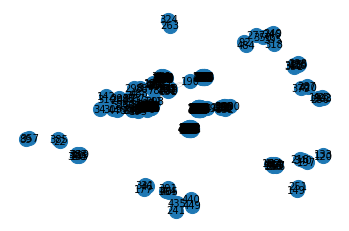

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

Gexp = nx.Graph()

l = len(tweets_exp)
for i in range(l):
    for j in range(i+1, l):
        if cosine_similarity(df_exp)[i][j] != 0:
            print(i, j)
            Gexp.add_edge(str(i), str(j), weight = cosine_similarity(df_exp)[i][j])
#         sc = abs(score[i] - score[j])
        #if  sc != 0:
#         Gexp.add_edge(str(i), str(j), weight = sc)

e = [(u, v) for (u, v, d) in Gexp.edges(data=True)]

pos = nx.spring_layout(Gexp)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(Gexp, pos, node_size=200)

# edges
nx.draw_networkx_edges(Gexp, pos, edgelist=e,
                       width=.1)
# labels
nx.draw_networkx_labels(Gexp, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

In [16]:
vexp = Gexp.number_of_nodes()
Gexp.number_of_edges()

7980

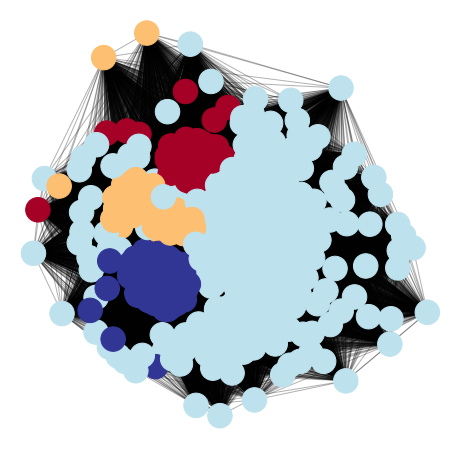

In [17]:
#plot of abstraction graph
import community
partitiona = community.best_partition(Gabs)
posa = nx.spring_layout(Gabs)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(Gabs, posa, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partitiona.values()))
nx.draw_networkx_edges(Gabs, posa, alpha=0.3)
plt.show(Gabs)

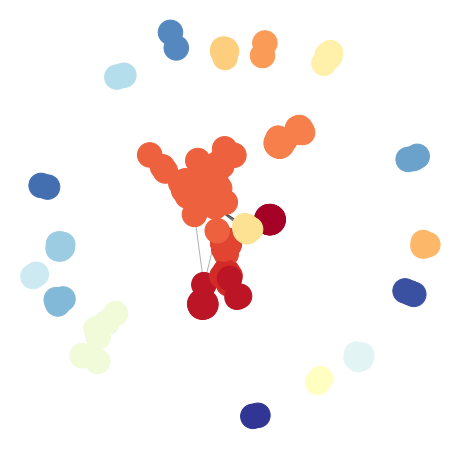

In [18]:
#plot of expression graph
import community
partitionb = community.best_partition(Gexp)
posb = nx.spring_layout(Gexp)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(Gexp, posb, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partitionb.values()))
nx.draw_networkx_edges(Gexp, posb, alpha=0.3)
plt.show(Gexp)

In [19]:
from collections import Counter
count_abs = Counter(partitiona.values())
count_exp = Counter(partitionb.values())
print("clusters in abstraction graph: ", count_abs)
print("clusters in expression graph: ", count_exp)

clusters in abstraction graph:  Counter({2: 284, 3: 95, 0: 61, 1: 60})
clusters in expression graph:  Counter({3: 92, 4: 79, 0: 54, 5: 34, 1: 31, 2: 11, 9: 8, 12: 8, 16: 8, 13: 6, 8: 5, 10: 4, 17: 4, 7: 3, 18: 3, 21: 3, 6: 2, 11: 2, 14: 2, 15: 2, 19: 2, 20: 2, 22: 2})


In [20]:
m_abs = max(count_abs, key=count_abs.get)
m_exp = max(count_exp, key=count_exp.get)
v_abs = count_abs[m_abs]
v_exp = count_exp[m_exp]

In [21]:
abs_score = float(v_abs/len(tweets_abs))
abs_score

0.568

In [22]:
exp_score = float(v_exp/len(tweets_abs))
exp_score

0.184

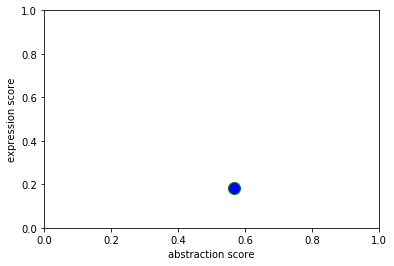

In [23]:
import matplotlib.pyplot as plt

plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel('abstraction score') 
# naming the y axis 
plt.ylabel('expression score') 
plt.plot(abs_score, exp_score, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.show()